# Telecom Churn Prediction

# Problem statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, we will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn, and identify the main indicators of churn.

In this competition, your goal is *to build a machine learning model that is able to predict churning customers based on the features provided for their usage.*

**Customer behaviour during churn:**

Customers usually do not decide to switch to another competitor instantly, but rather over a
period of time (this is especially applicable to high-value customers). In churn prediction, we
assume that there are three phases of customer lifecycle :

1. <u>The ‘good’ phase:</u> In this phase, the customer is happy with the service and behaves as usual.
<br>
2. <u>The ‘action’ phase:</u> The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. It is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)
<br>
3. <u>The ‘churn’ phase:</u> In this phase, the customer is said to have churned. In this case, since we are working over a three-month window, the first two months are the ‘good’ phase, the second month is the ‘action’ phase. Since churn data is already provided in the dataset so there is no need of the fourth month (September) as the 'churn' phase.

We are going to follow the process called CRISP-DM.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/639px-CRISP-DM_Process_Diagram.png" style="height: 400px; width:400px;"/>

After Business and Data Understanding via EDA, we will prepare data for modelling. Then evaluate and submit our predictions.

# 1. Loading Libraries

Lets start by loading our libraries. We can keep adding any imports to this cell block, as we write mode and mode code.

In [1]:
#Data Structures
#Libraries for data manipulation

import pandas as pd
import numpy as np
import re
import os

### For installing missingno library, type this command in terminal
#pip install missingno

import missingno as msno

#Sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
#Plotting
#Libraries for data visualization
from sklearn import metrics
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Others
# Ignore warnings due to version problems
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 2. Setting Dataframe display options

In [2]:
# Extending the view of dataframe 

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 115)
pd.set_option('display.width', None)

# Setting style for seaonrn

sns.color_palette("cubehelix", 8)
sns.set_style("whitegrid", {'axes.grid' : False})

# 3. Loading Datasets and Data Dictionary

In [3]:
churn_data = pd.read_csv("train.csv")
unseen = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")
data_dict = pd.read_csv("data_dictionary.csv")

print(churn_data.shape)
print(unseen.shape)
print(sample.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)


# 4. Data Exploration & Data Cleaning

In [4]:
# Finding data types of all columns and composition of null values across all columns
# Have used 'verbose' to display information of all columns and complete summary

churn_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        69999 non-null  int64  
 1    circle_id                 69999 non-null  int64  
 2    loc_og_t2o_mou            69297 non-null  float64
 3    std_og_t2o_mou            69297 non-null  float64
 4    loc_ic_t2o_mou            69297 non-null  float64
 5    last_date_of_month_6      69999 non-null  object 
 6    last_date_of_month_7      69600 non-null  object 
 7    last_date_of_month_8      69266 non-null  object 
 8    arpu_6                    69999 non-null  float64
 9    arpu_7                    69999 non-null  float64
 10   arpu_8                    69999 non-null  float64
 11   onnet_mou_6               67231 non-null  float64
 12   onnet_mou_7               67312 non-null  float64
 13   onnet_mou_8               66296 non-null  fl

## 4.1 Removing and fixing Missing Values in Columns

In [5]:
# List the date columns

date_cols = [x for x in churn_data.columns.to_list() if 'date' in x]
print(date_cols) 

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']


In [6]:
# Dropping date columns as the date columns are not required in our analysis

churn_data = churn_data.drop(date_cols, axis=1)
churn_data.shape

(69999, 163)

In [7]:
# Further identifying columns having single unqiue value all throughout.
# Finding the number of distinct/unique values in each column. NaN values are ignored. We don't include NaN in the counts.

unique_value_cols = churn_data.nunique(axis=0, dropna=True)
unique_value_cols = unique_value_cols[unique_value_cols==1]
unique_value_cols

circle_id           1
loc_og_t2o_mou      1
std_og_t2o_mou      1
loc_ic_t2o_mou      1
std_og_t2c_mou_6    1
std_og_t2c_mou_7    1
std_og_t2c_mou_8    1
std_ic_t2o_mou_6    1
std_ic_t2o_mou_7    1
std_ic_t2o_mou_8    1
dtype: int64

In [8]:
# Delete the above 10 columns from the dataframe as each of them has only one single value throughout. These will have no
# impact on our analysis.
# So the count of columns will be now 136 - 10 = 126.

churn_data.drop(columns=['circle_id', 
                         'loc_og_t2o_mou' , 'std_og_t2o_mou', 'loc_ic_t2o_mou',
                        'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
                         'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'], inplace=True)

churn_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 153 columns):
 #    Column              Non-Null Count  Dtype  
---   ------              --------------  -----  
 0    id                  69999 non-null  int64  
 1    arpu_6              69999 non-null  float64
 2    arpu_7              69999 non-null  float64
 3    arpu_8              69999 non-null  float64
 4    onnet_mou_6         67231 non-null  float64
 5    onnet_mou_7         67312 non-null  float64
 6    onnet_mou_8         66296 non-null  float64
 7    offnet_mou_6        67231 non-null  float64
 8    offnet_mou_7        67312 non-null  float64
 9    offnet_mou_8        66296 non-null  float64
 10   roam_ic_mou_6       67231 non-null  float64
 11   roam_ic_mou_7       67312 non-null  float64
 12   roam_ic_mou_8       66296 non-null  float64
 13   roam_og_mou_6       67231 non-null  float64
 14   roam_og_mou_7       67312 non-null  float64
 15   roam_og_mou_8       66296 non-null

In [9]:
# Find the number of NaN values across all columns

pd.options.display.min_rows = 200
churn_data.isnull().sum()

id                        0
arpu_6                    0
arpu_7                    0
arpu_8                    0
onnet_mou_6            2768
onnet_mou_7            2687
onnet_mou_8            3703
offnet_mou_6           2768
offnet_mou_7           2687
offnet_mou_8           3703
roam_ic_mou_6          2768
roam_ic_mou_7          2687
roam_ic_mou_8          3703
roam_og_mou_6          2768
roam_og_mou_7          2687
roam_og_mou_8          3703
loc_og_t2t_mou_6       2768
loc_og_t2t_mou_7       2687
loc_og_t2t_mou_8       3703
loc_og_t2m_mou_6       2768
loc_og_t2m_mou_7       2687
loc_og_t2m_mou_8       3703
loc_og_t2f_mou_6       2768
loc_og_t2f_mou_7       2687
loc_og_t2f_mou_8       3703
loc_og_t2c_mou_6       2768
loc_og_t2c_mou_7       2687
loc_og_t2c_mou_8       3703
loc_og_mou_6           2768
loc_og_mou_7           2687
loc_og_mou_8           3703
std_og_t2t_mou_6       2768
std_og_t2t_mou_7       2687
std_og_t2t_mou_8       3703
std_og_t2m_mou_6       2768
std_og_t2m_mou_7    

In [10]:
# Find the Total number of columns which have all null values

null_cols = churn_data.columns[churn_data.isnull().all()]
len(null_cols)

0

**Inference:** There are no columns with all null values.

In [11]:
#Find only the columns that have atleast one missing value and the percentage of missing values in such columns.

percent_missing = churn_data.isnull().sum() * 100 / len(churn_data)
percent_missing = percent_missing[percent_missing >0]
percent_missing.sort_values(ascending = False)

arpu_2g_6             74.902499
total_rech_data_6     74.902499
fb_user_6             74.902499
arpu_3g_6             74.902499
count_rech_3g_6       74.902499
max_rech_data_6       74.902499
night_pck_user_6      74.902499
count_rech_2g_6       74.902499
av_rech_amt_data_6    74.902499
count_rech_2g_7       74.478207
count_rech_3g_7       74.478207
arpu_3g_7             74.478207
av_rech_amt_data_7    74.478207
arpu_2g_7             74.478207
max_rech_data_7       74.478207
night_pck_user_7      74.478207
total_rech_data_7     74.478207
fb_user_7             74.478207
count_rech_2g_8       73.689624
total_rech_data_8     73.689624
count_rech_3g_8       73.689624
max_rech_data_8       73.689624
fb_user_8             73.689624
av_rech_amt_data_8    73.689624
night_pck_user_8      73.689624
arpu_3g_8             73.689624
arpu_2g_8             73.689624
loc_og_t2c_mou_8       5.290076
spl_ic_mou_8           5.290076
spl_og_mou_8           5.290076
isd_ic_mou_8           5.290076
og_other

In [12]:
#Find the columns & the number of columns having more than 70% missing data

print("No. of columns having more than 70% missing data", len(percent_missing[percent_missing >70]))

percent_missing[percent_missing >70]

No. of columns having more than 70% missing data 27


total_rech_data_6     74.902499
total_rech_data_7     74.478207
total_rech_data_8     73.689624
max_rech_data_6       74.902499
max_rech_data_7       74.478207
max_rech_data_8       73.689624
count_rech_2g_6       74.902499
count_rech_2g_7       74.478207
count_rech_2g_8       73.689624
count_rech_3g_6       74.902499
count_rech_3g_7       74.478207
count_rech_3g_8       73.689624
av_rech_amt_data_6    74.902499
av_rech_amt_data_7    74.478207
av_rech_amt_data_8    73.689624
arpu_3g_6             74.902499
arpu_3g_7             74.478207
arpu_3g_8             73.689624
arpu_2g_6             74.902499
arpu_2g_7             74.478207
arpu_2g_8             73.689624
night_pck_user_6      74.902499
night_pck_user_7      74.478207
night_pck_user_8      73.689624
fb_user_6             74.902499
fb_user_7             74.478207
fb_user_8             73.689624
dtype: float64

In [13]:
df1 = churn_data[churn_data.isna().any(axis=1)]
df1.churn_probability.value_counts()

churn_probability
0    52804
1     6910
Name: count, dtype: int64

## 4.2 Standardizing values

In [14]:
# Imputing zero against all NaN values

churn_data.fillna(value=0,axis=1,inplace=True)
churn_data.info(verbose=True, show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 153 columns):
 #    Column              Non-Null Count  Dtype  
---   ------              --------------  -----  
 0    id                  69999 non-null  float64
 1    arpu_6              69999 non-null  float64
 2    arpu_7              69999 non-null  float64
 3    arpu_8              69999 non-null  float64
 4    onnet_mou_6         69999 non-null  float64
 5    onnet_mou_7         69999 non-null  float64
 6    onnet_mou_8         69999 non-null  float64
 7    offnet_mou_6        69999 non-null  float64
 8    offnet_mou_7        69999 non-null  float64
 9    offnet_mou_8        69999 non-null  float64
 10   roam_ic_mou_6       69999 non-null  float64
 11   roam_ic_mou_7       69999 non-null  float64
 12   roam_ic_mou_8       69999 non-null  float64
 13   roam_og_mou_6       69999 non-null  float64
 14   roam_og_mou_7       69999 non-null  float64
 15   roam_og_mou_8       69999 non-null

**Inference:** There are no more missing values in any columns.

## 4.3 Removing and fixing Missing Values in Rows

In [15]:
# Check how many rows have all missing values

print('Total empty Rows:')
print(churn_data.isnull().all(axis=1).sum())


Total empty Rows:
0


**Inference:** There are no completely empty rows in whole dataset.

In [16]:
# Checking for missing values across the rows

print((churn_data.isnull().sum(axis=1)).max())


0


**Inference:** The max number of missing value in a row is 0.

In [17]:
# Count the rows having more than 50% missing values
df_missing_rows_50 = churn_data[(churn_data.isnull().sum(axis=1)) > (len(churn_data.columns)//2)]
df_missing_rows_50.churn_probability.value_counts()

Series([], Name: count, dtype: int64)

In [18]:
# Deleting the rows having more than 50% missing values
churn_data = churn_data.drop(df_missing_rows_50.index)
churn_data.shape

(69999, 153)

In [19]:
# Checking percentage of rows we have lost while handling the missing values
# round((1- (len(churn_data.index)/30011)),2)

round(((70000-len(churn_data))*100/70000),2)

0.0

**Inference:** No records have been lost.

## 4.4 Check for and delete unnecessary/filtering columns and rows

In [20]:
# Check for duplicate rows in the loan dataset based on member_id column

print(churn_data.duplicated(subset=None, keep='first').count())
duplicate=churn_data[churn_data.duplicated(['id'])]
duplicate

69999


,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,...,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability


In [21]:
cust_id=churn_data.pop('id')

**Inference:** There are no duplicate rows in dataset.

## 4.5 Correcting Data Types

In [22]:
# Converting the dependent variable 'churn_probablity' to Categorical datatype

#churn_data['churn_probability'] = churn_data['churn_probability'].astype('category')
#churn_data['churn_probability'] = churn_data['churn_probability'].astype('object')

churn_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 152 columns):
 #    Column              Non-Null Count  Dtype  
---   ------              --------------  -----  
 0    arpu_6              69999 non-null  float64
 1    arpu_7              69999 non-null  float64
 2    arpu_8              69999 non-null  float64
 3    onnet_mou_6         69999 non-null  float64
 4    onnet_mou_7         69999 non-null  float64
 5    onnet_mou_8         69999 non-null  float64
 6    offnet_mou_6        69999 non-null  float64
 7    offnet_mou_7        69999 non-null  float64
 8    offnet_mou_8        69999 non-null  float64
 9    roam_ic_mou_6       69999 non-null  float64
 10   roam_ic_mou_7       69999 non-null  float64
 11   roam_ic_mou_8       69999 non-null  float64
 12   roam_og_mou_6       69999 non-null  float64
 13   roam_og_mou_7       69999 non-null  float64
 14   roam_og_mou_8       69999 non-null  float64
 15   loc_og_t2t_mou_6    69999 non-null

## 4.6 Deriving New Columns

In [23]:
# List the columns of total mou, rech_num and rech_amt
[total for total in churn_data.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8']

### Deriving new column decrease_mou_action

This column indicates whether the minutes of usage of the customer has decreased in the action phase than the good phase.

In [24]:
# Average mou at good phase incoming and outgoing
# We are taking average because there are two months(6 and 7) in good phase

churn_data['avg_mou_good'] = (churn_data['total_og_mou_6'] + churn_data['total_og_mou_7'] + churn_data['total_ic_mou_6'] + churn_data['total_ic_mou_7'])/2

In [25]:
# Total mou at action phase incoming and outgoing

churn_data['total_mou_action'] = (churn_data['total_og_mou_8'] + churn_data['total_ic_mou_8'])

In [26]:
# Difference total_mou_action and avg_mou_good

churn_data['diff_mou'] = churn_data['total_mou_action'] - churn_data['avg_mou_good']

In [27]:
# Checking whether the mou has decreased in action phase
churn_data['decrease_mou_action'] = np.where((churn_data['diff_mou'] < 0), 1, 0)
churn_data['decrease_mou_action'] 

0        1
1        0
2        1
3        1
4        1
5        1
6        1
7        0
8        0
9        1
10       1
11       0
12       1
13       0
14       0
15       0
16       0
17       1
18       1
19       1
20       0
21       0
22       0
23       1
24       1
25       0
26       0
27       0
28       1
29       0
30       0
31       1
32       1
33       0
34       1
35       1
36       1
37       1
38       1
39       0
40       0
41       1
42       1
43       0
44       0
45       0
46       1
47       0
48       1
49       0
50       1
51       0
52       0
53       0
54       1
55       1
56       0
57       0
58       1
59       1
60       1
61       0
62       0
63       0
64       1
65       1
66       0
67       0
68       1
69       1
70       1
71       1
72       1
73       0
74       1
75       0
76       1
77       1
78       0
79       1
80       0
81       1
82       0
83       0
84       1
85       0
86       1
87       1
88       0
89       0
90       0

### Deriving new column decrease_rech_num_action

This column indicates whether the number of recharge of the customer has decreased in the action phase than the good phase.

In [28]:
# Avg rech number at good phase

churn_data['avg_rech_num_good'] = (churn_data['total_rech_num_6'] + churn_data['total_rech_num_7'])/2

In [29]:
# Difference of action phase rech num and good phase rech num

churn_data['diff_rech_num'] = churn_data['total_rech_num_8'] - churn_data['avg_rech_num_good']

In [30]:
# Checking if rech_num has decreased in action phase

churn_data['decrease_rech_num_action'] = np.where((churn_data['diff_rech_num'] < 0), 1, 0)
churn_data['decrease_rech_num_action']

0        1
1        0
2        1
3        0
4        1
5        0
6        0
7        1
8        1
9        1
10       1
11       0
12       0
13       1
14       1
15       0
16       1
17       0
18       0
19       0
20       1
21       1
22       1
23       1
24       0
25       0
26       0
27       1
28       0
29       0
30       0
31       1
32       1
33       0
34       1
35       1
36       1
37       1
38       1
39       0
40       0
41       1
42       0
43       1
44       0
45       1
46       0
47       1
48       1
49       1
50       1
51       1
52       0
53       1
54       1
55       1
56       0
57       1
58       1
59       1
60       1
61       0
62       0
63       1
64       0
65       1
66       0
67       1
68       1
69       1
70       1
71       1
72       1
73       1
74       1
75       1
76       1
77       1
78       1
79       1
80       0
81       1
82       0
83       0
84       1
85       1
86       1
87       1
88       1
89       0
90       0

In [31]:
churn_data.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,...,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_mou_good,total_mou_action,diff_mou,decrease_mou_action,avg_rech_num_good,diff_rech_num,decrease_rech_num_action
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1958.0,0.0,0.0,0.0,0.0,183.885,44.19,-139.695,1,2.5,-0.5,1
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,...,0.0,1.0,0.0,0.0,145.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,352.91,0.00,0.0,3.96,0.0,0.0,122.07,0.0,0.0,122.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,710.0,0.0,0.0,0.0,0.0,36.805,56.70,19.895,0,3.5,1.5,0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,882.0,0.0,0.0,0.0,0.0,156.985,36.64,-120.345,1,3.0,-1.0,1
3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.6,0.56,0.0,0.0,16.16,37.99,4.60,0.0,0.0,0.0,14.95,9.13,25.61,0.00,0.0,0.0,76.03,95.98,53.84,24.98,4.84,23.88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,982.0,0.0,0.0,0.0,0.0,158.650,137.68,-20.970,1,3.0,0.0,0
4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.00,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.00,9.85,0.00,58.91,25.94,15.76,0.00,0.00,0.00,4.35,0.00

### Deriving new column decrease_rech_amt_action

This column indicates whether the amount of recharge of the customer has decreased in the action phase than the good phase.

In [32]:
# Avg rech_amt in good phase

churn_data['avg_rech_amt_good'] = (churn_data['total_rech_amt_6'] + churn_data['total_rech_amt_7'])/2

In [33]:
# Difference of action phase rech amt and good phase rech amt

churn_data['diff_rech_amt'] = churn_data['total_rech_amt_8'] - churn_data['avg_rech_amt_good']

In [34]:
# Checking if rech_amt has decreased in action phase
churn_data['decrease_rech_amt_action'] = np.where((churn_data['diff_rech_amt'] < 0), 1, 0) 
churn_data['decrease_rech_amt_action'] 

0        1
1        1
2        1
3        1
4        1
5        0
6        0
7        0
8        0
9        0
10       1
11       0
12       1
13       1
14       1
15       0
16       0
17       1
18       1
19       0
20       0
21       1
22       1
23       1
24       1
25       0
26       0
27       1
28       0
29       0
30       0
31       1
32       1
33       1
34       1
35       1
36       1
37       1
38       1
39       0
40       0
41       1
42       0
43       0
44       0
45       1
46       0
47       0
48       1
49       0
50       1
51       1
52       0
53       1
54       1
55       0
56       0
57       1
58       1
59       1
60       1
61       0
62       0
63       1
64       1
65       1
66       0
67       0
68       1
69       0
70       1
71       0
72       1
73       0
74       0
75       1
76       1
77       1
78       1
79       1
80       0
81       1
82       1
83       0
84       1
85       1
86       0
87       1
88       0
89       0
90       0

In [35]:
churn_data.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,...,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_mou_good,total_mou_action,diff_mou,decrease_mou_action,avg_rech_num_good,diff_rech_num,decrease_rech_num_action,avg_rech_amt_good,diff_rech_amt,decrease_rech_amt_action
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1958.0,0.0,0.0,0.0,0.0,183.885,44.19,-139.695,1,2.5,-0.5,1,71.0,-61.0,1
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,...,0.0,145.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,352.91,0.00,0.0,3.96,0.0,0.0,122.07,0.0,0.0,122.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,710.0,0.0,0.0,0.0,0.0,36.805,56.70,19.895,0,3.5,1.5,0,72.5,-22.5,1
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,882.0,0.0,0.0,0.0,0.0,156.985,36.64,-120.345,1,3.0,-1.0,1,95.0,-95.0,1
3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.6,0.56,0.0,0.0,16.16,37.99,4.60,0.0,0.0,0.0,14.95,9.13,25.61,0.00,0.0,0.0,76.03,95.98,53.84,24.98,4.84,23.88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,982.0,0.0,0.0,0.0,0.0,158.650,137.68,-20.970,1,3.0,0.0,0,200.0,-70.0,1
4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.00,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.00,9.85,0.00,58.91,25.94,15.76,0.00,0.00,0.00,4

### Deriving new column decrease_arpu_action

This column indicates whether the average revenue per customer has decreased in the action phase than the good phase.

In [36]:
# ARUP in good phase
churn_data['avg_arpu_good'] = (churn_data['arpu_6'] + churn_data['arpu_7'])/2

In [37]:
# Difference of good and action phase ARPU
churn_data['diff_arpu'] = churn_data['arpu_8'] - churn_data['avg_arpu_good']

In [38]:
# Checking whether the arpu has decreased on the action month
churn_data['decrease_arpu_action'] = np.where(churn_data['diff_arpu'] < 0, 1, 0)
churn_data['decrease_arpu_action']

0        1
1        1
2        1
3        1
4        1
5        0
6        1
7        0
8        1
9        1
10       1
11       0
12       1
13       1
14       1
15       1
16       0
17       1
18       1
19       0
20       0
21       1
22       1
23       1
24       1
25       0
26       0
27       0
28       1
29       0
30       0
31       1
32       1
33       1
34       1
35       1
36       1
37       1
38       1
39       0
40       0
41       1
42       0
43       0
44       0
45       1
46       1
47       0
48       1
49       0
50       1
51       1
52       1
53       1
54       1
55       0
56       0
57       1
58       1
59       1
60       1
61       0
62       0
63       1
64       1
65       1
66       0
67       0
68       1
69       0
70       1
71       0
72       1
73       0
74       0
75       1
76       1
77       1
78       1
79       1
80       0
81       0
82       1
83       0
84       1
85       1
86       1
87       1
88       0
89       0
90       0

In [39]:
churn_data.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,...,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_mou_good,total_mou_action,diff_mou,decrease_mou_action,avg_rech_num_good,diff_rech_num,decrease_rech_num_action,avg_rech_amt_good,diff_rech_amt,decrease_rech_amt_action,avg_arpu_good,diff_arpu,decrease_arpu_action
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1958.0,0.0,0.0,0.0,0.0,183.885,44.19,-139.695,1,2.5,-0.5,1,71.0,-61.0,1,59.1430,-51.6160,1
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,352.91,0.00,0.0,3.96,0.0,0.0,122.07,0.0,0.0,122.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,710.0,0.0,0.0,0.0,0.0,36.805,56.70,19.895,0,3.5,1.5,0,72.5,-22.5,1,61.3935,-18.4405,1
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,882.0,0.0,0.0,0.0,0.0,156.985,36.64,-120.345,1,3.0,-1.0,1,95.0,-95.0,1,81.9910,-81.9910,1
3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.6,0.56,0.0,0.0,16.16,37.99,4.60,0.0,0.0,0.0,14.95,9.13,25.61,0.00,0.0,0.0,76.03,95.98,53.84,24.98,4.84,23.88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,982.0,0.0,0.0,0.0,0.0,158.650,137.68,-20.970,1,3.0,0.0,0,200.0,-70.0,1,180.8110,-69.7160,1
4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.00,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.00,9.85,0.00,58.91,25.9

### Deriving new column decrease_vbc_action

This column indicates whether the volume based cost of the customer has decreased in the action phase than the good phase.

In [40]:
# VBC in good phase

churn_data['avg_vbc_3g_good'] = (churn_data['jun_vbc_3g'] + churn_data['jul_vbc_3g'])/2

In [41]:
# Difference of good and action phase VBC

churn_data['diff_vbc'] = churn_data['aug_vbc_3g'] - churn_data['avg_vbc_3g_good']

In [42]:
# Checking whether the VBC has decreased on the action month

churn_data['decrease_vbc_action'] = np.where(churn_data['diff_vbc'] < 0 , 1, 0)
churn_data['decrease_vbc_action']

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        1
8        0
9        0
10       1
11       0
12       0
13       1
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
30       0
31       0
32       0
33       0
34       0
35       0
36       0
37       0
38       0
39       0
40       0
41       0
42       0
43       0
44       0
45       1
46       0
47       0
48       0
49       0
50       0
51       0
52       0
53       0
54       1
55       0
56       0
57       0
58       0
59       1
60       1
61       0
62       0
63       1
64       0
65       0
66       1
67       0
68       0
69       0
70       0
71       1
72       0
73       0
74       0
75       0
76       0
77       0
78       0
79       0
80       0
81       0
82       0
83       0
84       0
85       0
86       0
87       0
88       0
89       0
90       0

In [43]:
churn_data.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,...,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_mou_good,total_mou_action,diff_mou,decrease_mou_action,avg_rech_num_good,diff_rech_num,decrease_rech_num_action,avg_rech_amt_good,diff_rech_amt,decrease_rech_amt_action,avg_arpu_good,diff_arpu,decrease_arpu_action,avg_vbc_3g_good,diff_vbc,decrease_vbc_action
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1958.0,0.0,0.0,0.0,0.0,183.885,44.19,-139.695,1,2.5,-0.5,1,71.0,-61.0,1,59.1430,-51.6160,1,0.0,0.0,0
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,...,0.0,1.0,0.0,0.0,145.0,0.0,0.0,352.91,0.00,0.0,3.96,0.0,0.0,122.07,0.0,0.0,122.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,710.0,0.0,0.0,0.0,0.0,36.805,56.70,19.895,0,3.5,1.5,0,72.5,-22.5,1,61.3935,-18.4405,1,0.0,0.0,0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,882.0,0.0,0.0,0.0,0.0,156.985,36.64,-120.345,1,3.0,-1.0,1,95.0,-95.0,1,81.9910,-81.9910,1,0.0,0.0,0
3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.6,0.56,0.0,0.0,16.16,37.99,4.60,0.0,0.0,0.0,14.95,9.13,25.61,0.00,0.0,0.0,76.03,95.98,53.84,24.98,4.84,23.88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,982.0,0.0,0.0,0.0,0.0,158.650,137.68,-20.970,1,3.0,0.0,0,200.0,-70.0,1,180.8110,-69.7160,1,0.0,0.0,0
4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.00,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.00,9.85,0.00,58.91,25.94,15.76,0.0

## 4.7 Identifying and removing outliers

In [44]:
# List only the numeric columns
numeric_cols = churn_data.select_dtypes(exclude=['object','category']).columns
print(numeric_cols)

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'decrease_rech_num_action', 'avg_rech_amt_good', 'diff_rech_amt',
       'decrease_rech_amt_action', 'avg_arpu_good', 'diff_arpu',
       'decrease_arpu_action', 'avg_vbc_3g_good', 'diff_vbc',
       'decrease_vbc_action'],
      dtype='object', length=168)


In [45]:
numeric_cols

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'decrease_rech_num_action', 'avg_rech_amt_good', 'diff_rech_amt',
       'decrease_rech_amt_action', 'avg_arpu_good', 'diff_arpu',
       'decrease_arpu_action', 'avg_vbc_3g_good', 'diff_vbc',
       'decrease_vbc_action'],
      dtype='object', length=168)

In [46]:
churn_data.shape

(69999, 168)

In [47]:
# Removing outliers below 10th and above 90th percentile
#for col in numeric_cols: 
#    q1 = churn_data[col].quantile(0.10)
#    q3 = churn_data[col].quantile(0.90)
#    iqr = q3-q1
#    range_low  = q1-1.5*iqr
#    range_high = q3+1.5*iqr
#    # Assigning the filtered dataset into data
#    churn_data = churn_data.loc[(churn_data[col] > range_low) & (churn_data[col] < range_high)]

#churn_data.shape

In [48]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 168 entries, arpu_6 to decrease_vbc_action
dtypes: float64(163), int32(5)
memory usage: 88.4 MB


In [49]:
churn_data.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,...,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_mou_good,total_mou_action,diff_mou,decrease_mou_action,avg_rech_num_good,diff_rech_num,decrease_rech_num_action,avg_rech_amt_good,diff_rech_amt,decrease_rech_amt_action,avg_arpu_good,diff_arpu,decrease_arpu_action,avg_vbc_3g_good,diff_vbc,decrease_vbc_action
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1958.0,0.0,0.0,0.0,0.0,183.885,44.19,-139.695,1,2.5,-0.5,1,71.0,-61.0,1,59.1430,-51.6160,1,0.0,0.0,0
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,...,0.0,1.0,0.0,0.0,145.0,0.0,0.0,352.91,0.00,0.0,3.96,0.0,0.0,122.07,0.0,0.0,122.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,710.0,0.0,0.0,0.0,0.0,36.805,56.70,19.895,0,3.5,1.5,0,72.5,-22.5,1,61.3935,-18.4405,1,0.0,0.0,0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,882.0,0.0,0.0,0.0,0.0,156.985,36.64,-120.345,1,3.0,-1.0,1,95.0,-95.0,1,81.9910,-81.9910,1,0.0,0.0,0
3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.6,0.56,0.0,0.0,16.16,37.99,4.60,0.0,0.0,0.0,14.95,9.13,25.61,0.00,0.0,0.0,76.03,95.98,53.84,24.98,4.84,23.88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,982.0,0.0,0.0,0.0,0.0,158.650,137.68,-20.970,1,3.0,0.0,0,200.0,-70.0,1,180.8110,-69.7160,1,0.0,0.0,0
4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.00,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.00,9.85,0.00,58.91,25.94,15.76,0.0

# 5. Exploratory Data Analysis

## 5.1 Univariate Analysis

**Churn rate on the basis whether the customer decreased her/his MOU in action month**

In [50]:
churn_data[['decrease_mou_action','churn_probability']]

,decrease_mou_action,churn_probability
0,1,0.0
1,0,0.0
2,1,0.0
3,1,0.0
4,1,0.0
5,1,0.0
6,1,0.0
7,0,0.0
8,0,1.0
9,1,0.0


In [51]:
# Converting churn column to int in order to do aggfunc in the pivot table
churn_data['churn_probability'] = churn_data['churn_probability'].astype('int64')

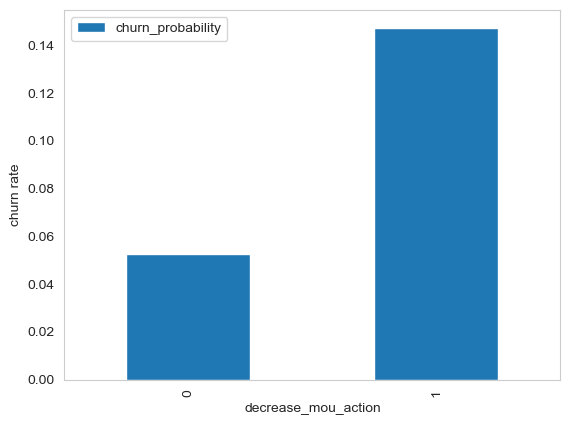

In [52]:
churn_data.pivot_table(values='churn_probability', index='decrease_mou_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

**Inference:** Churn rate is more for the customers, whose minutes of usage(mou) decreased in the action phase than in the good phase.

**Churn rate on the basis whether the customer decreased her/his number of recharge in action month**

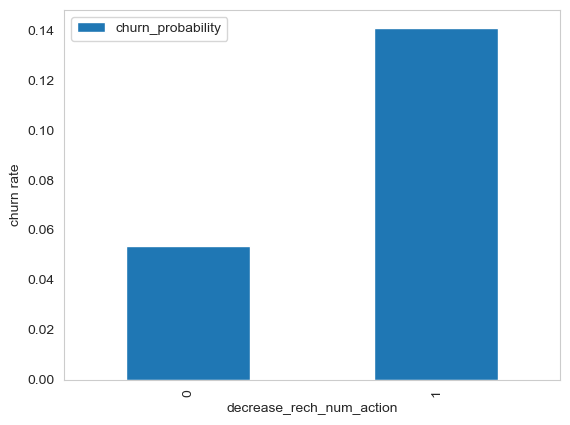

In [53]:
churn_data.pivot_table(values='churn_probability', index='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

**Inference:** Churn rate is more for the customers, whose number of recharge in the action phase is lesser than the number in good phase.

**Churn rate on the basis whether the customer decreased her/his amount of recharge in action month**

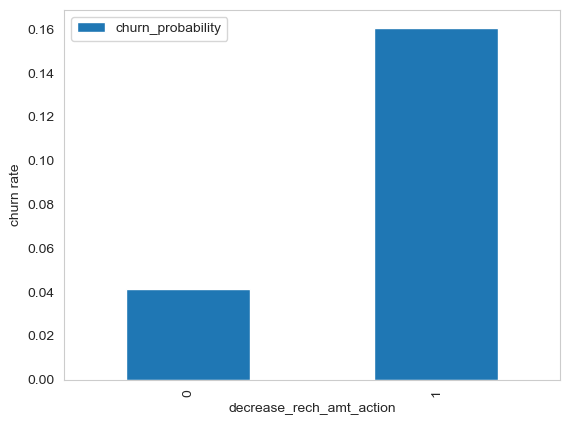

In [54]:
churn_data.pivot_table(values='churn_probability', index='decrease_rech_amt_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

**Inference:** Churn rate is more for the customers, whose amount of recharge in the action phase is lesser than the amount in good phase.

**Churn rate on the basis whether the customer decreased her/his revenue in action month**

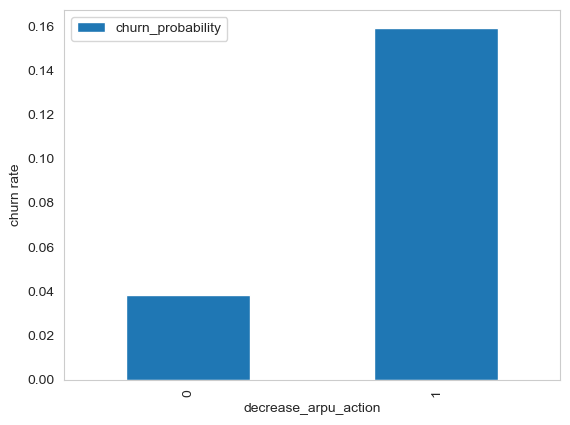

In [55]:
churn_data.pivot_table(values='churn_probability', index='decrease_arpu_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

**Inference:** Churn rate is more for the customers, whose revenue in the action phase is lesser than the revenue in good phase.

**Churn rate on the basis whether the customer decreased her/his volume based cost in action month**

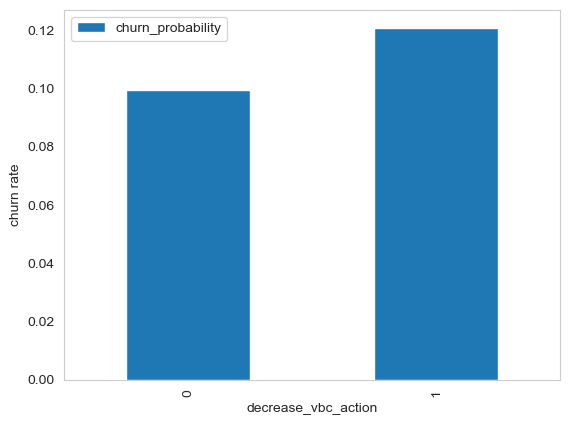

In [56]:
churn_data.pivot_table(values='churn_probability', index='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

**Inference:** Churn rate is more for the customers, whose volume based cost in action month is increased. That means the customers do not do the monthly recharge more when they are in the action phase.

**Analysis of the average revenue per customer (churn and not churn) in the action phase**

In [57]:
# Creating churn dataframe
data_churn = churn_data[churn_data['churn_probability'] == 1]
# Creating not churn dataframe
data_non_churn = churn_data[churn_data['churn_probability'] == 0]

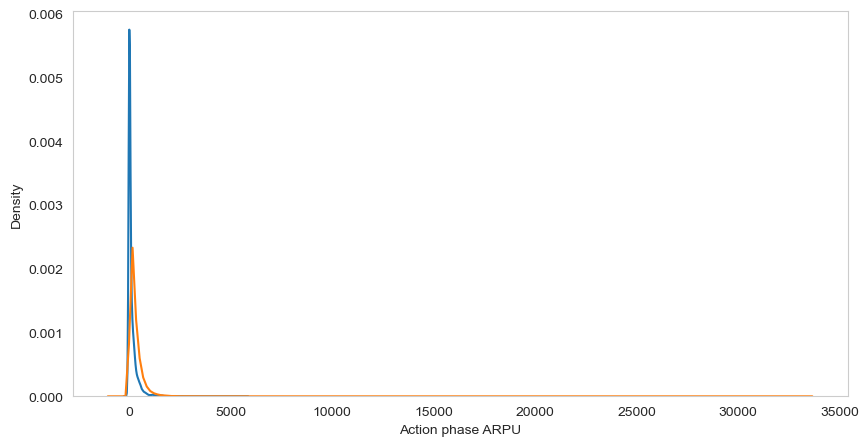

In [58]:
# Distribution plot
plt.figure(figsize=(10,5))
ax = sns.distplot(data_churn['arpu_8'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['arpu_8'],label='not churn',hist=False)
ax.set(xlabel='Action phase ARPU')
plt.show()

**Inference:** Average revenue per user (ARPU) for the churned customers is mostly densed on the 0 to 900. The higher ARPU customers are less likely to be churned.

ARPU for the not churned customers is mostly densed on the 0 to 1000.

**Analysis of the minutes of usage MOU (churn and not churn) in the action phase**

[Text(0.5, 0, 'Action phase MOU')]

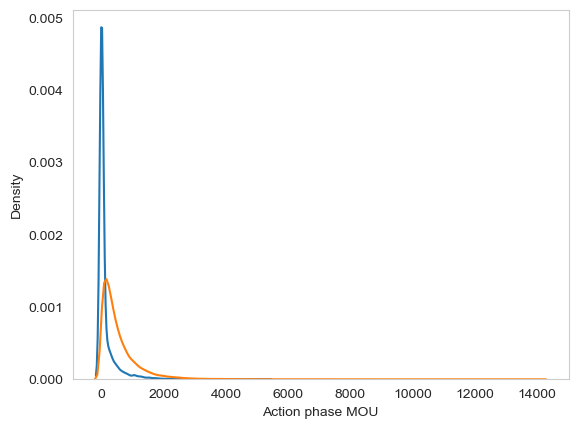

In [59]:
# Distribution plot
ax = sns.distplot(data_churn['total_mou_action'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['total_mou_action'],label='non churn',hist=False)
ax.set(xlabel='Action phase MOU')

**Inference:** Minutes of usage(MOU) of the churn customers is mostly populated on the 0 to 2500 range. Higher the MOU, lesser the churn probability.

**Age on Network**

In [60]:
#plt.figure(figsize=(12,8))
#sns.violinplot(x='aon', y='churn_probability', data=data_churn)
#sns.violinplot(x='aon', y='churn_probability', data=data_non_churn)
#plt.title('Age on Network vs Churn')
#plt.show()

## 5.2 Bivariate Analysis

**Analysis of churn rate by the decreasing recharge amount and number of recharge in the action phase**

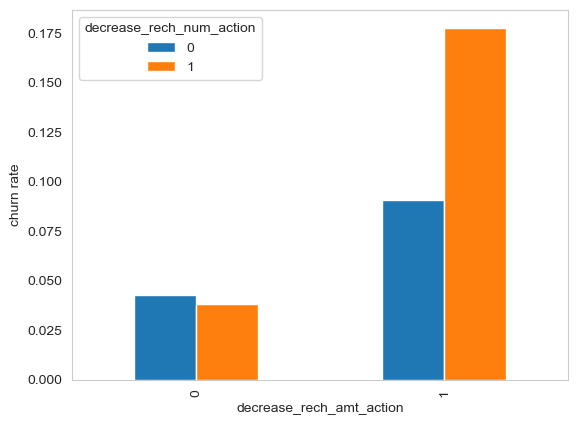

In [61]:
churn_data.pivot_table(values='churn_probability', index='decrease_rech_amt_action', columns='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

**Inference:** We can see from the above plot, that the churn rate is more for the customers, whose recharge amount as well as number of recharge have decreased in the action phase than the good phase.

**Analysis of churn rate by the decreasing recharge amount and volume based cost in the action phase**

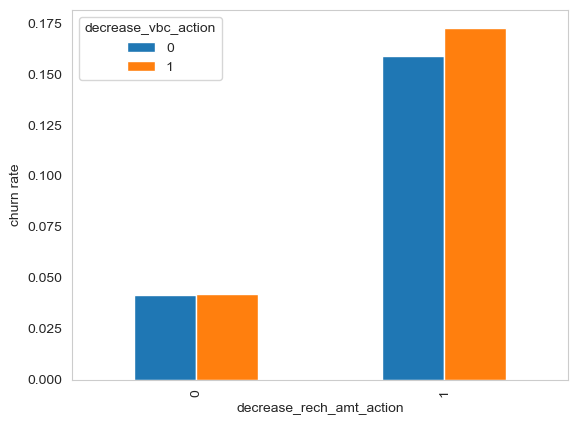

In [62]:
churn_data.pivot_table(values='churn_probability', index='decrease_rech_amt_action', columns='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

**Inference:** Here, also we can see that the churn rate is more for the customers, whose recharge amount is decreased along with the volume based cost is increased in the action month.

**Analysis of recharge amount and number of recharge in action month**

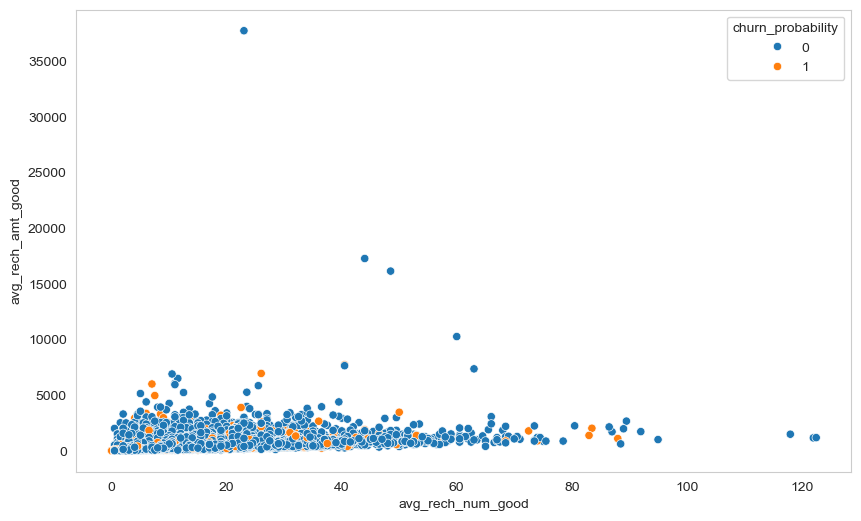

In [63]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='avg_rech_num_good',y='avg_rech_amt_good', hue='churn_probability', data=churn_data)

**Inference:** We can see from the above pattern that the recharge number and the recharge amount are mostly propotional. More the number of recharge, more the amount of the recharge.

### Dropping few derived columns, which are not required in further analysis

In [64]:
churn_data = churn_data.drop(['avg_mou_good','total_mou_action','diff_mou','avg_rech_num_good',
                             'diff_rech_num','avg_rech_amt_good','diff_rech_amt','avg_arpu_good',
                             'diff_arpu', 'avg_vbc_3g_good', 'diff_vbc'], axis=1)

In [65]:
churn_data.shape

(69999, 157)

### Summarize the features using the df.describe method:

In [66]:
churn_data.describe(include="all")

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,...,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,...,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,283.134365,278.185912,278.858826,127.887939,128.754731,125.943607,191.010582,189.585401,186.146273,9.379276,6.745305,6.634328,13.625476,9.464386,9.254848,45.050076,44.394344,43.269280,89.551272,87.313796,86.301054,3.595161,3.632045,3.467948,1.081499,1.308807,1.345676,138.203540,135.347249,133.045174,77.431415,80.560009,79.055781,84.666274,88.024790,85.794878,1.081836,1.042449,1.001784,163.182149,169.629833,165.854932,0.812319,0.779964,0.797125,3.802082,4.785743,4.778142,0.444289,0.023487,0.031310,306.451436,310.572674,304.513065,46.143461,46.044697,44.756489,...,59.294218,62.489478,0.619309,0.683981,0.697867,31.748339,32.260075,32.986614,0.468150,0.524807,0.530422,0.151159,0.159174,0.167445,48.395787,51.415168,51.782975,51.773924,51.240204,50.127506,122.171882,128.934444,135.486541,22.605302,22.743942,23.842085,21.800669,21.909458,22.718590

In [67]:
#Schurn_data.info(verbose=True, show_counts=True)

# 6. Create X, y and then Test - Train split

In [68]:
# Putting feature variable to X
X = churn_data.drop(['churn_probability'], axis=1)

X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,...,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,...,65.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1958.0,0.0,0.0,0.0,1,1,1,1,0
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,352.91,0.00,0.0,3.96,0.0,0.0,122.07,0.0,0.0,122.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,710.0,0.0,0.0,0.0,0,0,1,1,0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,...,70.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,882.0,0.0,0.0,0.0,1,1,1,1,0
3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.6,0.56,0.0,0.0,16.16,37.99,4.60,0.0,0.0,0.0,14.95,9.13,25.61,0.00,0.0,0.0,76.03,95.98,53.84,24.98,4.84,23.88,...,110.0,110.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,982.0,0.0,0.0,0.0,1,0,1,1,0
4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.00,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.00,9.85,0.00,58.91,25.94,15.76,0.00,0.00,0.00,4.35,0.00,0.0,0.00,0.0,0.0,4.35,0

In [69]:
# Putting target variable to y
y = churn_data['churn_probability']

y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn_probability, dtype: int64

In [70]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((55999, 156), (14000, 156), (55999,), (14000,))

# 7. Feature Scaling

In [71]:
# Instantiate the Scaler
scaler = StandardScaler()

In [72]:
# List of the numeric columns
cols_scale = X_train.columns.to_list()
# Removing the derived binary columns 
cols_scale.remove('decrease_mou_action')
cols_scale.remove('decrease_rech_num_action')
cols_scale.remove('decrease_rech_amt_action')
cols_scale.remove('decrease_arpu_action')
cols_scale.remove('decrease_vbc_action')

In [73]:
# Fit the data into scaler and transform
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [74]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,...,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
59805,-0.768898,0.507190,-0.769612,-0.432275,-0.232316,-0.410012,-0.614878,-0.180234,-0.580777,-0.164073,-0.122578,-0.126411,-0.188713,-0.162486,-0.143331,-0.299960,0.082106,-0.286321,-0.556160,0.293999,-0.574511,-0.276992,-0.277848,-0.271459,-0.198899,-0.168218,-0.212420,-0.550494,0.220581,-0.551481,-0.308050,-0.306378,-0.301178,-0.341697,-0.335962,-0.323522,-0.131497,-0.123071,-0.130952,-0.425383,-0.421120,-0.410786,-0.026971,-0.025406,-0.027141,-0.247816,-0.216212,-0.279964,-0.088010,-0.014111,-0.014358,-0.659638,-0.251981,-0.634036,-0.337947,-0.309467,-0.322314,...,-0.640040,-0.617387,-0.613925,-0.352579,-0.353930,-0.355083,-0.406864,-0.411383,-0.414802,-0.310307,-0.314414,-0.320232,-0.215464,-0.209382,-0.209032,-0.379001,-0.388028,-0.389927,-0.248675,-0.243972,-0.23686,-0.218024,-0.22973,-0.234240,-0.213167,-0.213324,-0.223019,-0.229139,-0.224485,-0.234591,-0.078849,-0.076993,-0.073144,-0.268239,-0.273015,-0.269532,-0.262939,-0.268468,-0.27573,-0.209883,-0.201927,-0.212607,-0.128093,-0.127708,-0.124883,-0.547093,-0.550646,-0.551913,-0.463407,-0.252737,-0.246090,-0.23044,1,0,0,1,0
32717,-0.365549,-0.285280,-0.557039,0.508870,0.154069,0.211406,0.305687,-0.138229,-0.148591,-0.164073,0.126349,-0.126411,-0.188713,-0.149115,-0.143331,1.249430,0.682948,0.923971,1.105095,0.184641,0.349501,-0.276992,-0.277848,-0.271459,4.037476,0.968474,1.907889,1.444343,0.529849,0.782479,-0.135106,-0.208641,-0.273085,-0.340685,-0.222722,-0.323522,-0.131497,-0.123071,-0.130952,-0.312022,-0.283662,-0.392593,-0.026971,-0.025406,-0.027141,1.249344,0.183144,0.514332,-0.088010,-0.014111,-0.014358,0.565390,0.039760,0.079490,0.136332,0.064114,0.420307,...,0.467234,-0.617387,0.664810,-0.352579,-0.353930,-0.355083,-0.406864,-0.411383,-0.414802,-0.310307,-0.314414,-0.320232,-0.215464,-0.209382,-0.209032,-0.379001,-0.388028,-0.389927,-0.248675,-0.243972,-0.23686,-0.218024,-0.22973,-0.234240,-0.213167,-0.213324,-0.223019,-0.229139,-0.224485,-0.234591,-0.078849,-0.076993,-0.073144,-0.268239,-0.273015,-0.269532,-0.262939,-0.268468,-0.27573,-0.209883,-0.201927,-0.212607,-0.128093,-0.127708,-0.124883,-0.547093,-0.550646,-0.551913,0.108240,-0.252737,-0.194735,-0.23044,1,1,1,1,1
5964,0.076747,0.538493,0.369580,-0.324804,-0.294960,-0.382206,-0.219622,0.080665,-0.465556,-0.164073,-0.122578,0.106308,-0.188713,-0.162486,-0.143331,-0.218483,-0.18213

**Scaling the test set**
We don't fit scaler on the test set. We only transform the test set.

In [75]:
# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,...,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
3425,-0.725879,0.808836,-0.783831,-0.343152,1.280236,-0.410012,-0.614685,1.990935,-0.575911,-0.150073,-0.119878,-0.126411,0.170921,0.259108,-0.143331,-0.299960,-0.132216,-0.286321,-0.556160,-0.270231,-0.574511,-0.276992,-0.277848,-0.271459,-0.198899,1.039196,-0.212420,-0.550494,-0.266934,-0.551481,-0.308050,1.564478,-0.301178,-0.341697,2.398089,-0.323522,-0.131497,-0.123071,-0.130952,-0.425383,2.580190,-0.410786,-0.026971,-0.025406,-0.027141,-0.247816,3.069444,-0.187701,-0.08801,-0.014111,-0.014358,-0.659638,2.166393,-0.630782,-0.337947,-0.183193,-0.322314,...,-0.640040,-0.513433,-0.613925,-0.352579,-0.353930,-0.355083,-0.406864,-0.411383,-0.414802,-0.310307,-0.314414,-0.320232,-0.215464,-0.209382,-0.209032,-0.379001,-0.388028,-0.389927,-0.248675,-0.243972,-0.236860,-0.218024,-0.229730,-0.234240,-0.213167,-0.213324,-0.223019,-0.229139,-0.224485,-0.234591,-0.078849,-0.076993,-0.073144,-0.268239,-0.273015,-0.269532,-0.262939,-0.268468,-0.275730,-0.209883,-0.201927,-0.212607,-0.128093,-0.127708,-0.124883,-0.547093,-0.550646,-0.551913,-0.391951,-0.252737,-0.246090,-0.23044,1,1,1,1,0
33067,1.433047,0.826856,-0.082563,1.053530,0.495545,-0.326266,3.186176,0.666692,-0.277036,1.065296,1.376022,1.195482,1.215215,2.934900,1.742636,0.773804,0.279201,-0.286321,2.926417,-0.168844,-0.574511,-0.243774,-0.136464,-0.271459,-0.198899,0.761452,0.575394,2.324601,0.062557,-0.551481,0.645297,0.110118,-0.301178,1.903873,0.579225,-0.323522,-0.131497,-0.123071,-0.130952,1.653108,0.447338,-0.410786,-0.026971,-0.025406,-0.027141,-0.247816,-0.216212,-0.279964,-0.08801,-0.014111,-0.014358,2.610065,0.395215,-0.634036,0.913212,0.169082,-0.322314,...,0.648424,0.526115,-0.613925,0.213527,-0.353930,0.155766,-0.085957,-0.411383,-0.098952,0.344757,-0.314414,0.283480,-0.215464,-0.209382,-0.209032,-0.183147,-0.388028,-0.201354,-0.248675,-0.243972,-0.236813,-0.218024,-0.229730,-0.234240,-0.213167,-0.213324,-0.223019,-0.228506,-0.224485,-0.231487,-0.078849,-0.076993,-0.073144,-0.268239,-0.273015,-0.269532,0.402718,-0.268468,0.336944,-0.209883,-0.201927,-0.212607,-0.128093,-0.127708,-0.124883,1.827842,-0.550646,-0.551913,-0.398256,-0.252737,-0.246090,-0.23044,1,1,1,1,0
52420,-0.054077,-0.640027,-0.768177,-0.071467,-0.330202,-0.410012,-0.390456,-0.591472,-0.578032,0.013600,-0.027003,-0.033816,2.202191,0.317160,-0.129839,-0.299960,-0.289788,-0.28632

# 8. Feature Selection using RFE

In [76]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
#rfe = RFE(logreg, step = 20)             # running RFE with 20 variables as output
rfe = RFE(logreg, n_features_to_select=90)             # running RFE with 90 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)    

[ True  True False  True  True  True  True False  True  True  True False
  True  True  True  True  True  True False False  True False  True  True
  True  True  True  True False  True  True False  True  True False  True
  True False  True  True  True  True False  True  True False False  True
 False False False  True  True  True  True  True  True False False  True
 False False  True False  True  True False  True False False  True  True
 False  True  True False False  True  True False  True  True  True  True
 False False  True  True False  True  True  True  True False False  True
 False  True  True  True  True  True False  True  True False False  True
 False  True  True False  True  True False False  True False False  True
 False False False False False  True False  True  True False False False
 False False False False  True  True False False False False False  True
  True  True  True False  True False False  True False  True  True False]
[ 1  1 29  1  1  1  1 57  1  1  1 23  1  1  1  1  

In [77]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
col

Index(['arpu_6', 'arpu_7', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_8',
       'std_og_t2t_mou_6', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_8',
       'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_7',
       'isd_og_mou_8', 'spl_og_mou_8', 'total_og_mou_6', 'total_og_mou_7',
       'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
      

In [78]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('arpu_6', True, 1),
 ('arpu_7', True, 1),
 ('arpu_8', False, 29),
 ('onnet_mou_6', True, 1),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', True, 1),
 ('offnet_mou_7', False, 57),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', True, 1),
 ('roam_ic_mou_7', True, 1),
 ('roam_ic_mou_8', False, 23),
 ('roam_og_mou_6', True, 1),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', True, 1),
 ('loc_og_t2t_mou_7', True, 1),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 17),
 ('loc_og_t2m_mou_7', False, 37),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 30),
 ('loc_og_t2f_mou_7', True, 1),
 ('loc_og_t2f_mou_8', True, 1),
 ('loc_og_t2c_mou_6', True, 1),
 ('loc_og_t2c_mou_7', True, 1),
 ('loc_og_t2c_mou_8', True, 1),
 ('loc_og_mou_6', True, 1),
 ('loc_og_mou_7', False, 26),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', True, 1),
 ('std_og_t2t_mou_7', False, 2),
 ('std_og_t2t_mou_8', True, 1),
 ('std_og_t2m_mo

In [79]:
# DataFrame with features supported by RFE
rfe_support = pd.DataFrame({'Column' : X_train.columns.to_list(), 'Rank' : rfe.ranking_, 
                                      'Support' :  rfe.support_}).sort_values(by=
                                       'Rank', ascending=True)
rfe_support

,Column,Rank,Support
0,arpu_6,1,True
92,total_rech_num_8,1,True
91,total_rech_num_7,1,True
90,total_rech_num_6,1,True
89,ic_others_8,1,True
87,ic_others_6,1,True
86,isd_ic_mou_8,1,True
83,spl_ic_mou_8,1,True
82,spl_ic_mou_7,1,True
81,spl_ic_mou_6,1,True


# 9. Model 1 - Logistic Regression with RFE Selected Columns¶

In [80]:
# Let's run the model using the selected variables

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9)
logsk_fit=logsk.fit(X_train[col], y_train)
#logsk.fit(X_train, y_train)


In [81]:
logm4 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
modres = logm4.fit()
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                55999
Model:                            GLM   Df Residuals:                    55910
Model Family:                Binomial   Df Model:                           88
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 11 Mar 2024   Deviance:                       23023.
Time:                        09:50:25   Pearson chi2:                 1.22e+07
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -4.3461      0.122    -35.712      0.000      -4.585      -4.108
arpu_6                       0.1685      0.043      3.918      0.000       0.084       0.253
arpu_7                       0.2015      0.063      3.179      0.001       0.077       0.326
onnet_mou_6                 -1.4512      0.920     -1.577      0.115      -3.255       0.353
onnet_mou_7                 -0.0730      0.050     -1.471      0.141      -0.170       0.024
onnet_mou_8                 -1.1287      1.070     -1.055      0.292      -3.226       0.969
offnet_mou_6                -1.5803      0.944     -1.673      0.094      -3.431       0.271
offnet_mou_8                -1.6749      1.100     -1.522      0.128      -3.831       0.481
roam_ic_mou_6                0.0589      0.019      3.169      0.002       0.022       0.095
roam_ic_mou_7                0.0040      0.016      0.258      0.797      -0.027       0.035
roam_og_mou_6                0.3609      0.224      1.610      0.107      -0.078       0.800
roam_og_mou_7                0.0101      0.023      0.436      0.663      -0.035       0.055
roam_og_mou_8                0.4049      0.225      1.802      0.072      -0.036       0.845
loc_og_t2t_mou_6             0.0826      0.123      0.670      0.503      -0.159       0.324
loc_og_t2t_mou_7             0.0542      0.085      0.637      0.524      -0.113       0.221
loc_og_t2t_mou_8          9271.5985    619.099     14.976      0.000    8058.187    1.05e+04
loc_og_t2m_mou_8          9198.0896    614.173     14.976      0.000    7994.333    1.04e+04
loc_og_t2f_mou_7             0.0434      0.045      0.973      0.331      -0.044       0.131
loc_og_t2f_mou_8           786.9986     52.546     14.977      0.000     684.010     889.987
loc_og_t2c_mou_6            -0.0636      0.025     -2.582      0.010      -0.112      -0.015
loc_og_t2c_mou_7             0.0416      0.023      1.846      0.065      -0.003       0.086
loc_og_t2c_mou_8             0.0181      0.034      0.537      0.591      -0.048       0.084
loc_og_mou_6                 0.1267      0.298      0.426      0.670      -0.457       0.710
loc_og_mou_8             -1.267e+04   1247.501    -10.158      0.000   -1.51e+04   -1.02e+04
std_og_t2t_mou_6         -1509.3546   1011.065     -1.493      0.135   -3491.007     472.297
std_og_t2t_mou_8          1438.3698   1422.798      1.011      0.312   -1350.264    4227.003
std_og_t2m_mou_6         -1502.8874   1006.779     -1.493      0.135   -3476.138     470.364
std_og_t2m_mou_8          1463.9045   1447.661      1.011      0.312   -1373.460    4301.269
std_og_t2f_mou_6           -50.9767     34.140     -1.493      0.135    -117.889      15.936
std_og_t2f_mou_8            43.2980     42.891      1.009      0.313     -40.767     127.363
std_og_mou_6  

In [82]:
def calc_metrics(y_pred):
    y_pred_df = pd.DataFrame(y_pred)
    y_pred_1 = y_pred_df.iloc[:,[1]]
    print("Prediction probability")
    print(y_pred_1.head())
    y_test_df = pd.DataFrame(y_test)
    print("\nActual test value")
    print(y_test_df.head())
    y_test_df['CustID'] = y_test_df.index
    # Removing index for both dataframes to append them side by side 
    y_pred_1.reset_index(drop=True, inplace=True)
    y_test_df.reset_index(drop=True, inplace=True)
    # Appending y_test_df and y_pred_1
    y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
    # Renaming the column 
    print("\nPrediction and actual values")
    print(y_pred_final.head())
    y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
    y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
    # Let's see the head
    print("\nPredicted values and actual values")
    print(y_pred_final.head())
    confusion = metrics.confusion_matrix( y_pred_final.churn_probability, y_pred_final.predicted )
    print("\nconfusion=")
    print(confusion)
    metrics.accuracy_score(y_pred_final.churn_probability, y_pred_final.predicted)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] 
    print("\nAccuracy:-",metrics.accuracy_score(y_pred_final.churn_probability, y_pred_final.predicted))
    # Sensitivity
    print("Sensitivity:-",TP / float(TP+FN))
    # Specificity
    print("Specificity:-", TN / float(TN+FP))
    # Precision
    print("Precision:-", TP / float(TP+FP))
    # Recall
    print("Recall:-", TP / float(TP+FN))

In [83]:
def calc_metrics_for_pca(pred_value,actual_value):
    confusion = metrics.confusion_matrix(actual_value, pred_value)
    print("\nconfusion=")
    print(confusion)
    metrics.accuracy_score(actual_value, pred_value)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] 
    print("\nAccuracy:-",metrics.accuracy_score(actual_value, pred_value))
    # Sensitivity
    print("Sensitivity:-",TP / float(TP+FN))
    # Specificity
    print("Specificity:-", TN / float(TN+FP))
    # Precision
    print("Precision:-", TP / float(TP+FP))
    # Recall
    print("Recall:-", TP / float(TP+FN))

In [84]:
y_pred = logsk.predict_proba(X_test[col])

### Model Evaluation

In [85]:
calc_metrics(y_pred)

Prediction probability
          1
0  0.540334
1  0.636319
2  0.414891
3  0.086892
4  0.342157

Actual test value
       churn_probability
3425                   1
33067                  1
52420                  0
5220                   0
33958                  1

Prediction and actual values
   churn_probability  CustID         1
0                  1    3425  0.540334
1                  1   33067  0.636319
2                  0   52420  0.414891
3                  0    5220  0.086892
4                  1   33958  0.342157

Predicted values and actual values
   churn_probability  CustID  Churn_Prob  predicted
0                  1    3425    0.540334          1
1                  1   33067    0.636319          1
2                  0   52420    0.414891          0
3                  0    5220    0.086892          0
4                  1   33958    0.342157          0

confusion=
[[12460   148]
 [ 1043   349]]

Accuracy:- 0.9149285714285714
Sensitivity:- 0.2507183908045977
Specificity:- 0.9

In [91]:
def draw_roc():
    y_pred_df = pd.DataFrame(y_pred)
    y_pred_1 = y_pred_df.iloc[:,[1]]
    y_test_df = pd.DataFrame(y_test)
    y_test_df['CustID'] = y_test_df.index
    y_pred_1.reset_index(drop=True, inplace=True)
    y_test_df.reset_index(drop=True, inplace=True)
    y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
    y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
    y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
    fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.churn_probability, y_pred_final.predicted,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( y_pred_final.churn_probability, y_pred_final.predicted )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    print("\033[1m Overall Accuracy:- {:2.2f}".format(metrics.roc_auc_score(y_pred_final.churn_probability, y_pred_final.Churn_Prob)))
    print('\033[0m')
    return fpr, tpr, thresholds

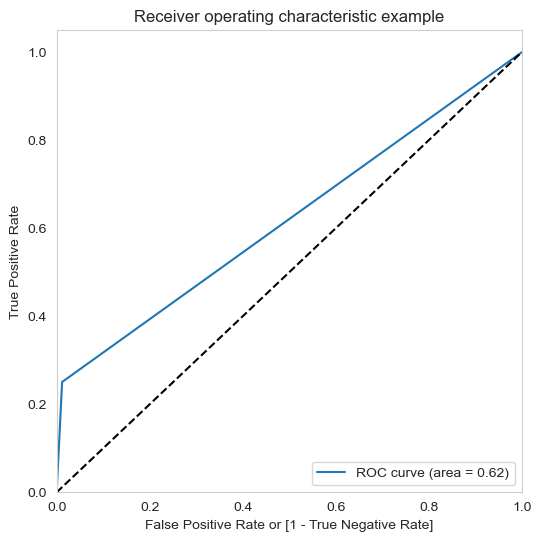

 Overall Accuracy:- 0.90



(array([0.        , 0.01173858, 1.        ]),
 array([0.        , 0.25071839, 1.        ]),
 array([inf,  1.,  0.]))

In [92]:
draw_roc()

**Inference:** We see an overall AUC score of 0.90. Let's apply PCA on the data and then perform Logistic Regression using PCA.

# 10. PCA on the data
- While computng the principal components, we will not include the entire dataset. Model building is all about doing well on the data we haven't seen yet!
- So we'll calculate the PCs using the train data, and apply them later on the test data

In [141]:
X_train.shape

(55999, 156)

In [142]:
# Instantiate PCA

pca = PCA(random_state=42)

In [143]:
# Fit train set on PCA

pca.fit(X_train)

PCA(random_state=42)

In [144]:
# Principal components
pca.components_

array([[ 1.47621166e-01,  1.57153956e-01,  1.49694789e-01, ...,
        -7.61652810e-04, -2.84245718e-03,  2.04223744e-02],
       [ 9.62313787e-02,  1.03533174e-01,  9.47688901e-02, ...,
         1.02176810e-04, -1.93462325e-03, -2.00026981e-02],
       [-5.08539848e-02, -6.85349889e-02, -6.19256482e-02, ...,
         5.97419844e-04,  3.58133264e-03,  2.89441105e-03],
       ...,
       [-0.00000000e+00, -1.42004560e-16,  1.44518064e-16, ...,
         5.95009060e-17, -8.09193260e-17, -3.34708509e-17],
       [ 0.00000000e+00, -6.83610119e-17, -1.00178281e-16, ...,
         1.26796140e-17, -1.80601552e-17, -1.11720070e-16],
       [ 0.00000000e+00, -2.07291400e-16,  7.97640038e-17, ...,
        -1.20157037e-16,  3.70083296e-17, -1.92762143e-17]])

In [145]:
col500 = list(X_train.columns)
df_pca500 = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2], 'Feature':col500})
df_pca500

,PC1,PC2,PC3,Feature
0,0.147621,0.096231,-0.050854,arpu_6
1,0.157154,0.103533,-0.068535,arpu_7
2,0.149695,0.094769,-0.061926,arpu_8
3,0.062359,0.123816,-0.095473,onnet_mou_6
4,0.067565,0.133371,-0.115064,onnet_mou_7
5,0.064785,0.125444,-0.110573,onnet_mou_8
6,0.092831,0.142350,-0.050680,offnet_mou_6
7,0.097225,0.151857,-0.072467,offnet_mou_7
8,0.092045,0.139379,-0.066949,offnet_mou_8
9,0.017150,0.014840,-0.015273,roam_ic_mou_6


In [146]:
# Looking at the explained variance ratio for each component
pca.explained_variance_ratio_

array([1.24968184e-01, 9.28765775e-02, 6.17369284e-02, 5.00299588e-02,
       3.73198895e-02, 3.06184211e-02, 2.71246682e-02, 2.44088863e-02,
       2.36634873e-02, 2.23598708e-02, 2.02618030e-02, 2.01009710e-02,
       1.86100275e-02, 1.80149647e-02, 1.66701784e-02, 1.65951444e-02,
       1.49000350e-02, 1.42708396e-02, 1.38813522e-02, 1.31950864e-02,
       1.17762513e-02, 1.10401782e-02, 1.07183929e-02, 1.06775175e-02,
       1.03663079e-02, 1.00833562e-02, 9.81305563e-03, 9.53555991e-03,
       8.44089763e-03, 8.15260321e-03, 7.81817001e-03, 7.47912988e-03,
       7.08764669e-03, 6.78727306e-03, 6.76767684e-03, 6.51734519e-03,
       6.28460365e-03, 6.19831888e-03, 6.03665107e-03, 5.99256821e-03,
       5.79473004e-03, 5.71542471e-03, 5.60307684e-03, 5.47500459e-03,
       5.36554049e-03, 4.95182343e-03, 4.77936880e-03, 4.70047388e-03,
       4.56577170e-03, 4.23135393e-03, 4.11530745e-03, 3.73398943e-03,
       3.66316057e-03, 3.61687385e-03, 3.47264531e-03, 3.37883937e-03,
      

#### Making a scree plot for the explained variance

In [147]:
# Cumuliative varinace of the PCs
# look at explained variance of PCA components
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(pd.Series(variance_cumu))


0      0.124968
1      0.217845
2      0.279582
3      0.329612
4      0.366932
5      0.397550
6      0.424675
7      0.449084
8      0.472747
9      0.495107
10     0.515369
11     0.535470
12     0.554080
13     0.572095
14     0.588765
15     0.605360
16     0.620260
17     0.634531
18     0.648412
19     0.661607
20     0.673384
21     0.684424
22     0.695142
23     0.705820
24     0.716186
25     0.726269
26     0.736082
27     0.745618
28     0.754059
29     0.762211
30     0.770030
31     0.777509
32     0.784596
33     0.791384
34     0.798151
35     0.804669
36     0.810953
37     0.817152
38     0.823188
39     0.829181
40     0.834976
41     0.840691
42     0.846294
43     0.851769
44     0.857135
45     0.862086
46     0.866866
47     0.871566
48     0.876132
49     0.880363
50     0.884479
51     0.888213
52     0.891876
53     0.895493
54     0.898965
55     0.902344
56     0.905675
57     0.908927
58     0.912115
59     0.915142
60     0.918128
61     0.921032
62     0

In [148]:
# look at explained variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       12.50
1       21.78
2       27.96
3       32.96
4       36.69
5       39.75
6       42.47
7       44.91
8       47.27
9       49.51
10      51.54
11      53.55
12      55.41
13      57.21
14      58.88
15      60.54
16      62.03
17      63.45
18      64.84
19      66.16
20      67.34
21      68.44
22      69.51
23      70.58
24      71.62
25      72.63
26      73.61
27      74.56
28      75.41
29      76.22
30      77.00
31      77.75
32      78.46
33      79.14
34      79.82
35      80.47
36      81.10
37      81.72
38      82.32
39      82.92
40      83.50
41      84.07
42      84.63
43      85.18
44      85.71
45      86.21
46      86.69
47      87.16
48      87.61
49      88.04
50      88.45
51      88.82
52      89.19
53      89.55
54      89.90
55      90.23
56      90.57
57      90.89
58      91.21
59      91.51
60      91.81
61      92.10
62      92.38
63      92.66
64      92.92
65      93.19
66      93.44
67      93.69
68      93.93
69      94.15
70      94.38
71    

**Inference:** ~ 56 components explain 90% variance

~ 74 components explain 95% variance

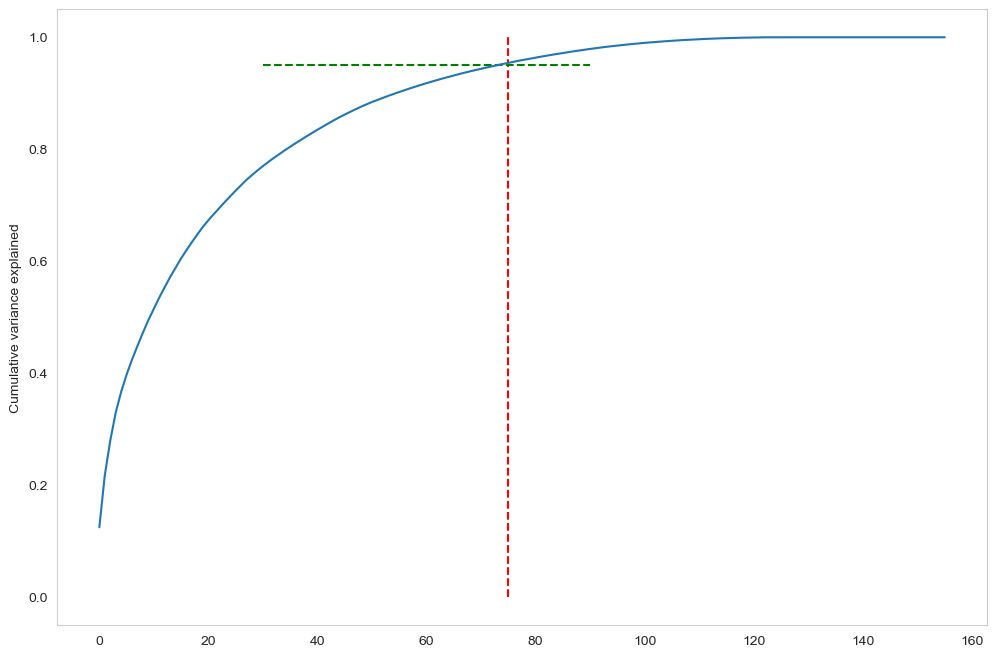

In [149]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=75, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=90, xmin=30, colors="g", linestyles="--")
plt.plot(variance_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

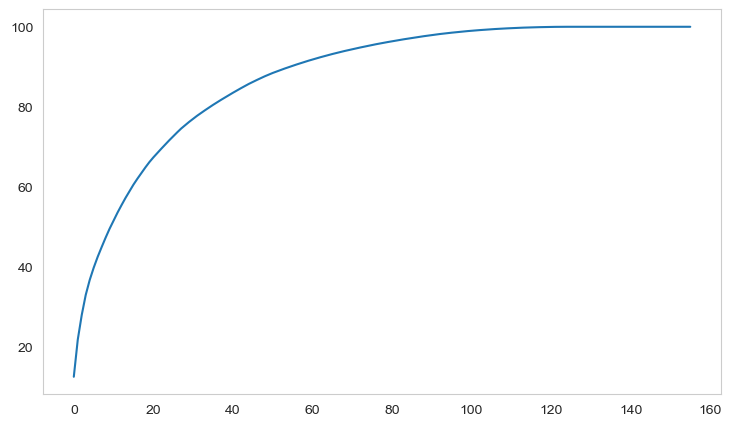

In [150]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

### Perform PCA with 75 components

In [151]:
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA

In [152]:
# Instantiate PCA with 75 components
pca_final = IncrementalPCA(n_components=75)

In [153]:
# Fit and transform the X_train

X_train_pca = pca_final.fit_transform(X_train)

In [154]:
X_train_pca.shape

(55999, 75)

In [155]:
#Finding correlation between the coefficients

corrmat = np.corrcoef(X_train_pca.transpose())

In [156]:
corrmat.shape

(75, 75)

Plotting the heatmap of the corr matrix

<Axes: >

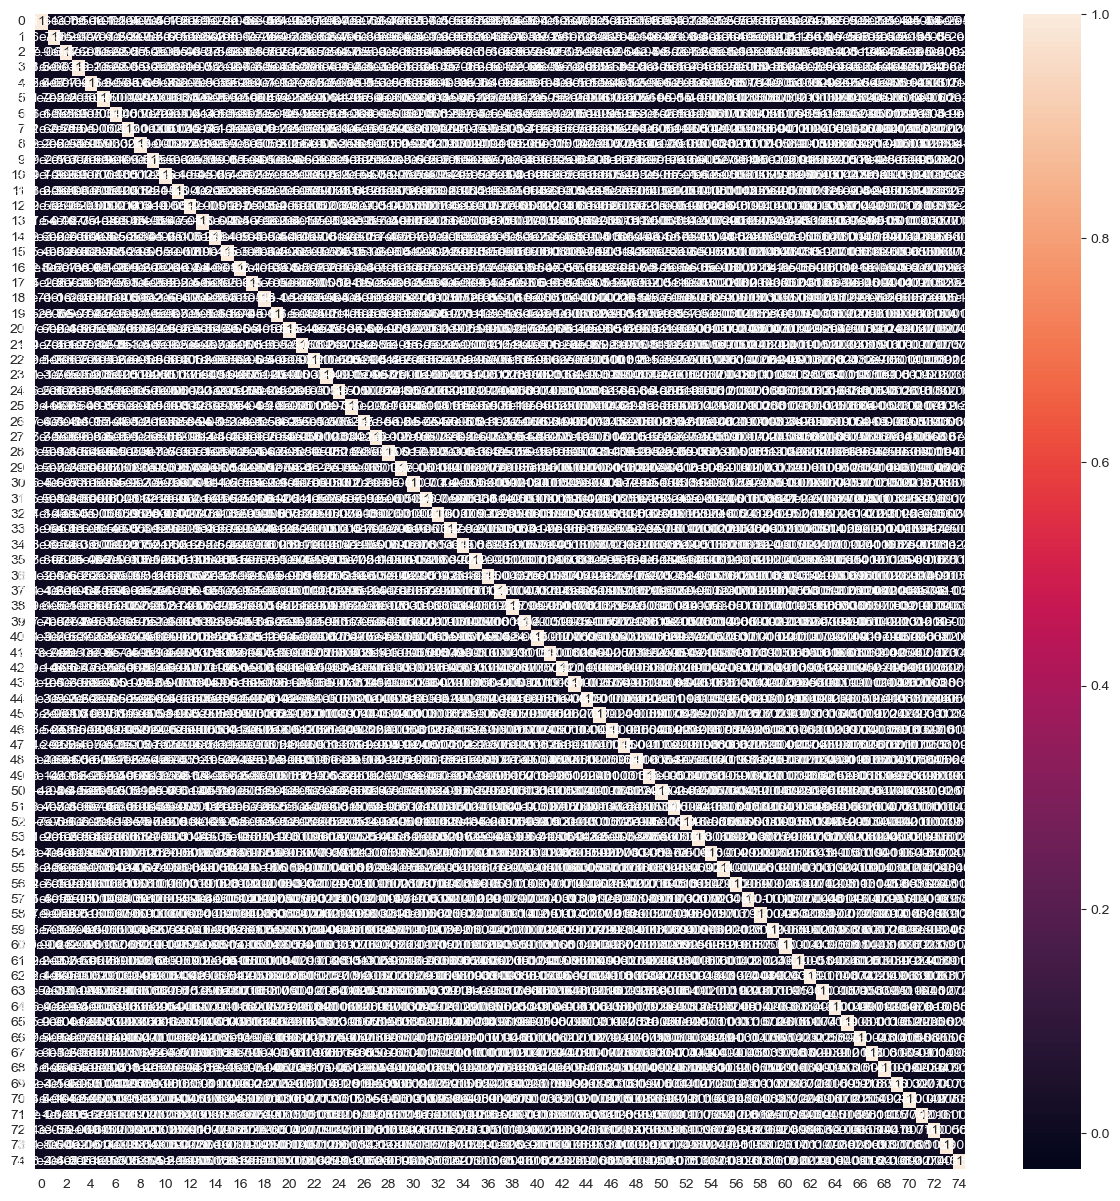

In [157]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

**Applying transformation on the test set** <br>
- We are only doing Transform in the test set not the Fit-Transform. Because the Fitting is already done on the train set. So, we just have to do the transformation with the already fitted data on the train set.

In [158]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(14000, 75)

### Emphasize Sensitivity/Recall than Accuracy <br>
We are more focused on higher Sensitivity/Recall score than the accuracy. <br>

Beacuse we need to care more about churn customers than the not churn customers. The main goal is to retain the customers, who have the possiblity to churn. It won't harm, if we consider few not churn customers as churn customers and provide them some incentives to retain them. Hence, the sensitivity score is more important here.

### Applying Logistic Regression on the data on our Principal Components

In [159]:
from sklearn.linear_model import LogisticRegression

In [160]:
learner_pca = LogisticRegression()

In [161]:
model_pca = learner_pca.fit(X_train_pca, y_train)

Making predictions on the test set

In [162]:
pred_probs_test = model_pca.predict_proba(X_test_pca)

In [163]:
from sklearn import metrics
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.89'

Making it a little more unsupervised

In [164]:
pca_again = PCA(0.95)

In [165]:
df_train_pca2 = pca_again.fit_transform(X_train)

In [166]:
df_train_pca2.shape

(55999, 74)

Following it up with a logistic regression model

In [167]:
learner_pca2 = LogisticRegression()

In [168]:
model_pca2 = learner_pca2.fit(df_train_pca2, y_train)

In [169]:
df_test_pca2 = pca_again.transform(X_test)

In [170]:
calc_metrics(df_test_pca2)

Prediction probability
          1
0  1.150028
1  3.317859
2 -1.310270
3 -4.191214
4 -0.777061

Actual test value
       churn_probability
3425                 1.0
33067                1.0
52420                0.0
5220                 0.0
33958                1.0

Prediction and actual values
   churn_probability  CustID         1
0                1.0    3425  1.150028
1                1.0   33067  3.317859
2                0.0   52420 -1.310270
3                0.0    5220 -4.191214
4                1.0   33958 -0.777061

Predicted values and actual values
   churn_probability  CustID  Churn_Prob  predicted
0                1.0    3425    1.150028          1
1                1.0   33067    3.317859          1
2                0.0   52420   -1.310270          0
3                0.0    5220   -4.191214          0
4                1.0   33958   -0.777061          0

confusion=
[[7819 4789]
 [1055  337]]

Accuracy:- 0.5825714285714285
Sensitivity:- 0.24209770114942528
Specificity:- 0.6201

In [171]:
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]

In [172]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.89'

**Inference:** We see an overall AUC score of 0.89. This is almost the same as what we got above in Logistic Regression using RFE.

# 11. Model 2 - Logistic regression with PCA

### Tuning hyperparameter C

C is the the inverse of regularization strength in Logistic Regression. Higher values of C correspond to less regularization.

In [173]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [174]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [175]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.196543,0.011018,0.007946,0.007652,0.01,{'C': 0.01},0.173061,0.192627,0.191281,0.195392,0.207420,0.191956,0.011035,6,0.189621,0.213319,0.189991,0.201182,0.204436,0.199710,0.009010
1,0.261231,0.012280,0.009398,0.007674,0.1,{'C': 0.1},0.208014,0.229493,0.229537,0.232082,0.261383,0.232102,0.017035,5,0.229253,0.248335,0.219671,0.246060,0.244620,0.237588,0.011200
2,0.316687,0.022128,0.004689,0.006058,1,{'C': 1},0.216539,0.235023,0.231317,0.237201,0.266442,0.237304,0.016256,4,0.232976,0.253921,0.224003,0.251751,0.251427,0.242816,0.012067
3,0.304760,0.016995,0.012526,0.006263,10,{'C': 10},0.217391,0.235023,0.231317,0.238908,0.266442,0.237816,0.016049,1,0.233633,0.254135,0.224653,0.252627,0.252306,0.243471,0.012054
4,0.334204,0.023085,0.002028,0.002802,100,{'C': 100},0.217391,0.235023,0.231317,0.238908,0.266442,0.237816,0.016049,1,0.234071,0.254350,0.224653,0.252408,0.252306,0.243558,0.011989
5,0.358826,0.042608,0.011894,0.006071,1000,{'C': 1000},0.217391,0.235023,0.231317,0.237201,0.265599,0.237306,0.015736,3,0.234071,0.254565,0.224653,0.251970,0.252306,0.243513,0.011965


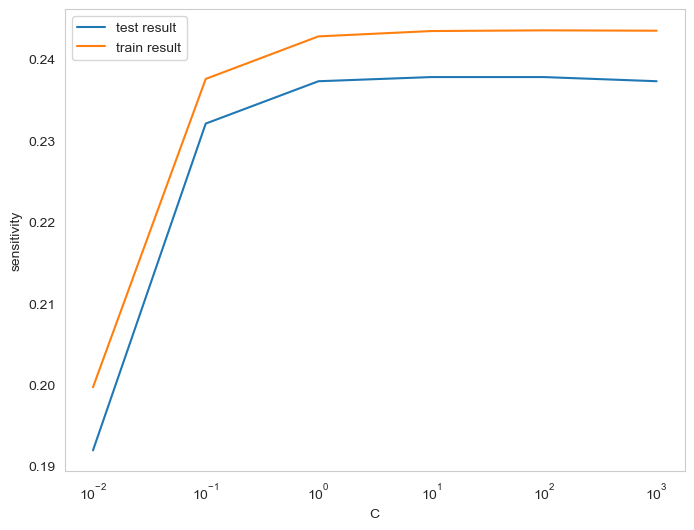

In [176]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [177]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.23781614857567437 at C = 10


#### Logistic regression with optimal C

In [178]:
# Instantiate the model with best C

logistic_pca = LogisticRegression(C=best_C)

In [179]:
# Fit the model on the train set

log_pca_model = logistic_pca.fit(X_train_pca, y_train)

#### Prediction on the train set

In [180]:
# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_pca)

In [181]:
# Confusion matrix
calc_metrics_for_pca(y_train_pred,y_train)


confusion=
[[49660   599]
 [ 4379  1361]]

Accuracy:- 0.9111055554563474
Sensitivity:- 0.23710801393728223
Specificity:- 0.9880817366043892
Precision:- 0.6943877551020409
Recall:- 0.23710801393728223


#### Prediction on the test set

In [182]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)

In [183]:
calc_metrics_for_pca(y_test_pred,y_test)


confusion=
[[12450   158]
 [ 1076   316]]

Accuracy:- 0.9118571428571428
Sensitivity:- 0.22701149425287356
Specificity:- 0.9874682741116751
Precision:- 0.6666666666666666
Recall:- 0.22701149425287356


# 12. Model 3 - Decision Tree with PCA

In [197]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

#### Hyperparameter tuning

In [198]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5,10, 15),
    'min_samples_leaf': range(1000, 1500, 2000),
    'min_samples_split': range(2000, 2500, 3000),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 10, 15),
                         'min_samples_leaf': range(1000, 1500, 2000),
                         'min_samples_split': range(2000, 2500, 3000)},
             scoring='recall', verbose=1)

In [199]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.204459,0.034911,0.003565,0.00664,5,1000,2000,"{'max_depth': 5, 'min_samples_leaf': 1000, 'mi...",0.401568,0.388502,0.369338,0.382404,0.261324,0.360627,0.050723,1


In [200]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.36062717770034847
DecisionTreeClassifier(max_depth=5, min_samples_leaf=1000,
                       min_samples_split=2000)


#### Model with optimal hyperparameters

In [201]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=1000,
                                  min_samples_split=2000)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=1000,
                       min_samples_split=2000, random_state=100)

#### Prediction on the train set

In [202]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)

In [203]:
calc_metrics_for_pca(y_train_pred,y_train)


confusion=
[[48393  1866]
 [ 3515  2225]]

Accuracy:- 0.903908998374971
Sensitivity:- 0.3876306620209059
Specificity:- 0.9628723213752761
Precision:- 0.543876802737717
Recall:- 0.3876306620209059


#### Prediction on the test set

In [204]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)

In [205]:
calc_metrics_for_pca(y_test_pred,y_test)


confusion=
[[12169   439]
 [  838   554]]

Accuracy:- 0.9087857142857143
Sensitivity:- 0.39798850574712646
Specificity:- 0.9651808375634517
Precision:- 0.5579053373615307
Recall:- 0.39798850574712646


# 13. Model 4 - Random Forest with PCA

In [328]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

#### Hyperparameter tuning

In [329]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(1000, 1500, 2000),
    'min_samples_split': range(2000, 2500, 3000),
    'n_estimators': [10, 20], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(1000, 1500, 2000),
                         'min_samples_split': range(2000, 2500, 3000),
                         'n_estimators': [10, 20]},
             return_train_score=True, verbose=1)

In [330]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8974981694794177 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 1000, 'min_samples_split': 2000, 'n_estimators': 10}


#### Model with optimal hyperparameters

In [331]:
# model with the best hyperparameters

rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=1000, 
                             min_samples_split=2000,
                             max_features=10,
                             n_estimators=10)

In [332]:
# Fit the model
rfc_model.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=1000,
                       min_samples_split=2000, n_estimators=10)

#### Prediction on the train set

In [333]:
# Predictions on the train set
y_train_pred = rfc_model.predict(X_train_pca)

In [334]:
calc_metrics_for_pca(y_train_pred,y_train)


confusion=
[[50259     0]
 [ 5740     0]]

Accuracy:- 0.8974981696101716
Sensitivity:- 0.0
Specificity:- 1.0
Precision:- nan
Recall:- 0.0


####  Prediction on the test set

In [335]:
# Prediction on the test set
y_test_pred = rfc_model.predict(X_test_pca)

In [336]:
calc_metrics_for_pca(y_test_pred,y_test)


confusion=
[[12608     0]
 [ 1392     0]]

Accuracy:- 0.9005714285714286
Sensitivity:- 0.0
Specificity:- 1.0
Precision:- nan
Recall:- 0.0


# 14. Model 5 - XGBoost with PCA

In [337]:
import xgboost as xgb
pca_xgb = xgb.XGBClassifier(random_state=42, 
                                    tree_method='hist', 
                                   objective='binary:logistic',
                                  
                                  
                                  )  # scale_pos_weight takes care of class imbalance
pca_xgb.fit(X_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [338]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [339]:
from sklearn.metrics import roc_auc_score
print('Baseline Train AUC Score')
roc_auc_score(y_train, pca_xgb.predict_proba(X_train_pca)[:, 1])

Baseline Train AUC Score


0.9946191723388526

In [340]:
print('Baseline Test AUC Score')
roc_auc_score(y_test, pca_xgb.predict_proba(X_test_pca)[:, 1])

Baseline Test AUC Score


0.9067707877501604

In [341]:
## Hyper parameter Tuning
parameters = {
              'learning_rate': [0.1, 0.2, 0.3],
              'gamma' : [1,2,5],
              'max_depth': [2,3,4],
              'min_child_weight': [2,5],
              'n_estimators': [5,10,15]}
pca_xgb_search = GridSearchCV(estimator=pca_xgb , param_grid=parameters,scoring='roc_auc', cv=folds, n_jobs=-1, verbose=1)
pca_xgb_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     inte...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'gamma': [1, 2, 5], 'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 4], 'min_child_weight': [2, 5],
                         'n_estimators': [5, 10, 15]},
             scoring='roc_auc', verbose=1)

In [359]:
# Optimum Hyperparameters
print('Best ROC-AUC score :', pca_xgb_search.best_score_)
print('Best Parameters :', pca_xgb_search.best_params_)

Best ROC-AUC score : 0.900743740400177
Best Parameters : {'gamma': 5, 'learning_rate': 0.3, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 15}


In [360]:
# Modelling using the best PCA-XGBoost Estimator 
pca_xgb_best = pca_xgb_search.best_estimator_
pca_xgb_best_fit = pca_xgb_best.fit(X_train_pca, y_train)

# Prediction on Train set
y_train_pred_pca_xgb_best = pca_xgb_best_fit.predict(X_train_pca)
y_train_pred_pca_xgb_best[:5]

array([0, 0, 0, 0, 0])

In [361]:
# Prediction on test set
X_test_pca = pca_final.transform(X_test)
#X_test_pca = pd.DataFrame(X_test_pca, index=X_test.index, columns = X_train_pca.columns)
y_test_pred_pca_xgb_best = pca_xgb_best_fit.predict(X_test_pca)
y_test_pred_pca_xgb_best[:5]

array([0, 1, 0, 0, 0])

In [362]:
## PCA - XGBOOST [Hyper parameter tuned] Model Performance

train_matrix = confusion_matrix(y_train, y_train_pred_pca_xgb_best)
test_matrix = confusion_matrix(y_test, y_test_pred_pca_xgb_best)

print('Train Performance :\n')
calc_metrics_for_pca(y_train_pred_pca_xgb_best,y_train)

print('\nTest Performance :\n')
calc_metrics_for_pca( y_test_pred_pca_xgb_best,y_test)

Train Performance :


confusion=
[[49279   980]
 [ 3365  2375]]

Accuracy:- 0.9224093287380132
Sensitivity:- 0.4137630662020906
Specificity:- 0.9805010047951611
Precision:- 0.7078986587183308
Recall:- 0.4137630662020906

Test Performance :


confusion=
[[12355   253]
 [  848   544]]

Accuracy:- 0.9213571428571429
Sensitivity:- 0.39080459770114945
Specificity:- 0.9799333756345178
Precision:- 0.6825595984943539
Recall:- 0.39080459770114945


In [363]:
## PCA - XGBOOST [Hyper parameter tuned] Model Performance
print('Train AUC Score')
print(roc_auc_score(y_train, pca_xgb_best.predict_proba(X_train_pca)[:, 1]))
print('Test AUC Score')
print(roc_auc_score(y_test, pca_xgb_best.predict_proba(X_test_pca)[:, 1]))

Train AUC Score
0.9124482012443834
Test AUC Score
0.9075631657422398


# 16. Prediction on Unseen Data

In [364]:
unseen_data = pd.read_csv("test.csv")
print(unseen_data.shape)

(30000, 171)


In [365]:
unseen_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 171 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        30000 non-null  int64  
 1    circle_id                 30000 non-null  int64  
 2    loc_og_t2o_mou            29684 non-null  float64
 3    std_og_t2o_mou            29684 non-null  float64
 4    loc_ic_t2o_mou            29684 non-null  float64
 5    last_date_of_month_6      30000 non-null  object 
 6    last_date_of_month_7      29798 non-null  object 
 7    last_date_of_month_8      29633 non-null  object 
 8    arpu_6                    30000 non-null  float64
 9    arpu_7                    30000 non-null  float64
 10   arpu_8                    30000 non-null  float64
 11   onnet_mou_6               28831 non-null  float64
 12   onnet_mou_7               28828 non-null  float64
 13   onnet_mou_8               28325 non-null  fl

In [366]:
# Mimicing the training set, delete the above 10 columns from the dataframe as each of them has only one single value 
# throughout. These will have no impact on our analysis.

unseen_data.drop(columns=['circle_id', 
                         'loc_og_t2o_mou' , 'std_og_t2o_mou', 'loc_ic_t2o_mou',
                        'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
                         'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'], inplace=True)

unseen_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 161 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        30000 non-null  int64  
 1    last_date_of_month_6      30000 non-null  object 
 2    last_date_of_month_7      29798 non-null  object 
 3    last_date_of_month_8      29633 non-null  object 
 4    arpu_6                    30000 non-null  float64
 5    arpu_7                    30000 non-null  float64
 6    arpu_8                    30000 non-null  float64
 7    onnet_mou_6               28831 non-null  float64
 8    onnet_mou_7               28828 non-null  float64
 9    onnet_mou_8               28325 non-null  float64
 10   offnet_mou_6              28831 non-null  float64
 11   offnet_mou_7              28828 non-null  float64
 12   offnet_mou_8              28325 non-null  float64
 13   roam_ic_mou_6             28831 non-null  fl

In [367]:
# List the date columns

date_cols2 = [x for x in unseen_data.columns.to_list() if 'date' in x]
print(date_cols2) 

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']


In [368]:
# Dropping the the date columns

unseen_data = unseen_data.drop(date_cols2, axis=1)
unseen_data.shape

(30000, 152)

In [369]:
X_test_unseen = unseen_data
test_id=X_test_unseen.pop('id')

In [370]:
# Processing the columns in the unseen data set so that it resembles the training data set

X_test_unseen['avg_mou_good'] = (X_test_unseen['total_og_mou_6'] + X_test_unseen['total_og_mou_7'] + X_test_unseen['total_ic_mou_6'] + X_test_unseen['total_ic_mou_7'])/2
X_test_unseen['total_mou_action'] = (X_test_unseen['total_og_mou_8'] + X_test_unseen['total_ic_mou_8'])
X_test_unseen['diff_mou'] = X_test_unseen['total_mou_action'] - X_test_unseen['avg_mou_good']
X_test_unseen['decrease_mou_action'] = np.where((X_test_unseen['diff_mou'] < 0), 1, 0)
X_test_unseen['avg_rech_num_good'] = (X_test_unseen['total_rech_num_6'] + X_test_unseen['total_rech_num_7'])/2
X_test_unseen['diff_rech_num'] = X_test_unseen['total_rech_num_8'] - X_test_unseen['avg_rech_num_good']
X_test_unseen['decrease_rech_num_action'] = np.where((X_test_unseen['diff_rech_num'] < 0), 1, 0)
X_test_unseen['avg_rech_amt_good'] = (X_test_unseen['total_rech_amt_6'] + X_test_unseen['total_rech_amt_7'])/2
X_test_unseen['diff_rech_amt'] = X_test_unseen['total_rech_amt_8'] - X_test_unseen['avg_rech_amt_good']
X_test_unseen['decrease_rech_amt_action'] = np.where((X_test_unseen['diff_rech_amt'] < 0), 1, 0) 
X_test_unseen['avg_arpu_good'] = (X_test_unseen['arpu_6'] + X_test_unseen['arpu_7'])/2
X_test_unseen['diff_arpu'] = X_test_unseen['arpu_8'] - X_test_unseen['avg_arpu_good']
X_test_unseen['decrease_arpu_action'] = np.where(X_test_unseen['diff_arpu'] < 0, 1, 0)
X_test_unseen['avg_vbc_3g_good'] = (X_test_unseen['jun_vbc_3g'] + X_test_unseen['jul_vbc_3g'])/2
X_test_unseen['diff_vbc'] = X_test_unseen['aug_vbc_3g'] - X_test_unseen['avg_vbc_3g_good']
X_test_unseen['decrease_vbc_action'] = np.where(X_test_unseen['diff_vbc'] < 0 , 1, 0)
X_test_unseen.fillna(value=0,axis=1,inplace=True)
X_test_unseen = X_test_unseen.drop(['avg_mou_good','total_mou_action','diff_mou','avg_rech_num_good',
                             'diff_rech_num','avg_rech_amt_good','diff_rech_amt','avg_arpu_good',
                             'diff_arpu', 'avg_vbc_3g_good', 'diff_vbc'], axis=1)

In [371]:
# Transform the unseen test set

X_test_unseen[cols_scale] = scaler.transform(X_test_unseen[cols_scale])
X_test_unseen.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,...,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
0,-0.558567,-0.604699,-0.591690,-0.324294,-0.353098,-0.334500,-0.420783,-0.494077,-0.472138,-0.164073,-0.122578,-0.126411,-0.188713,-0.162486,-0.143331,-0.135285,-0.158283,-0.146916,-0.443242,-0.499007,-0.518728,-0.276992,0.759989,-0.271459,-0.198899,-0.168218,-0.207683,-0.379183,-0.370908,-0.429306,-0.280227,-0.306378,-0.293321,-0.171499,-0.306690,-0.223964,-0.131497,-0.123071,-0.130952,-0.296807,-0.401992,-0.340097,-0.026971,-0.025406,-0.027141,-0.247816,-0.216212,-0.278190,-0.088010,-0.014111,-0.014358,-0.460924,-0.538190,-0.513186,-0.115236,-0.058280,-0.164239,...,-0.338057,-0.305523,-0.613925,-0.352579,-0.35393,-0.355083,-0.406864,-0.411383,-0.414802,-0.310307,-0.314414,-0.320232,-0.215464,-0.209382,-0.209032,-0.379001,-0.388028,-0.389927,-0.248675,-0.243972,-0.23686,-0.218024,-0.22973,-0.23424,-0.213167,-0.213324,-0.223019,-0.229139,-0.224485,-0.234591,-0.078849,-0.076993,-0.073144,-0.268239,-0.273015,-0.269532,-0.262939,-0.268468,-0.27573,-0.209883,-0.201927,-0.212607,-0.128093,-0.127708,-0.124883,-0.547093,-0.550646,-0.551913,0.497044,-0.252737,-0.246090,-0.230440,1.0,1.0,1.0,1.0,0.0
1,0.384464,0.672575,0.226687,-0.175710,-0.284574,-0.345185,0.915493,1.354377,0.651090,-0.164073,-0.122578,-0.126411,-0.188713,-0.162486,-0.143331,0.199824,-0.021902,-0.154992,2.393592,3.336934,1.942766,-0.220598,-0.277848,-0.271459,-0.198899,-0.168218,-0.212420,1.639633,2.058209,1.097070,-0.308050,-0.306378,-0.301178,-0.341697,-0.245400,-0.256924,-0.131497,-0.123071,-0.130952,-0.425383,-0.361943,-0.366903,-0.026971,-0.025406,-0.001951,-0.247816,-0.216212,-0.279964,-0.088010,-0.014111,-0.014358,0.528799,0.736641,0.232795,-0.191162,-0.130505,-0.303544,...,1.876491,-0.617387,-0.613925,-0.352579,-0.35393,-0.355083,-0.406864,-0.411383,-0.414802,-0.310307,-0.314414,-0.320232,-0.215464,-0.209382,-0.209032,-0.379001,-0.388028,-0.389927,-0.248675,-0.243972,-0.23686,-0.218024,-0.22973,-0.23424,-0.213167,-0.213324,-0.223019,-0.229139,-0.224485,-0.234591,-0.078849,-0.076993,-0.073144,-0.268239,-0.273015,-0.269532,-0.262939,-0.268468,-0.27573,-0.209883,-0.201927,-0.212607,-0.128093,-0.127708,-0.124883,-0.547093,-0.550646,-0.551913,1.380785,-0.252737,-0.246090,-0.230440,1.0,0.0,0.0,1.0,0.0
2,0.137726,0.443684,1.290635,-0.406656,-0.393500,-0.382565,-0.560096,-0.451289,-0.440291,0.230162,1.738163,0.367429,0.146845,0.746031,0.691333,-0

In [372]:
X_test_unseen.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 156 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    arpu_6                    30000 non-null  float64
 1    arpu_7                    30000 non-null  float64
 2    arpu_8                    30000 non-null  float64
 3    onnet_mou_6               30000 non-null  float64
 4    onnet_mou_7               30000 non-null  float64
 5    onnet_mou_8               30000 non-null  float64
 6    offnet_mou_6              30000 non-null  float64
 7    offnet_mou_7              30000 non-null  float64
 8    offnet_mou_8              30000 non-null  float64
 9    roam_ic_mou_6             30000 non-null  float64
 10   roam_ic_mou_7             30000 non-null  float64
 11   roam_ic_mou_8             30000 non-null  float64
 12   roam_og_mou_6             30000 non-null  float64
 13   roam_og_mou_7             30000 non-null  fl

In [373]:
# PCA on the unseen data. Applying transformation on the unseen test set.

X_test_unseen_pca = pca_final.transform(X_test_unseen)
X_test_unseen_pca.shape

(30000, 75)

In [374]:
# Prediction on the unseen test set using Decision Tree with PCA Model

#dt_predict=dt_pca_model.predict(X_test_unseen_pca)

In [375]:
# Prediction on the unseen test set using Logistic Regression with PCA Model

#lr_predict = log_pca_model.predict(X_test_unseen_pca)

In [376]:
# Prediction on the unseen test set using Logistic Regression with PCA Model

xgb_predict=pca_xgb_best_fit.predict(X_test_unseen_pca)

# 17. Creating Submission File

In [377]:
# Creating submission file

series = pd.Series(xgb_predict)  
submission = pd.concat([test_id,series],axis=1)
submission= submission.rename(columns={ 0 : 'churn_probability'})
submission.churn_probability=submission.churn_probability.astype('int64')
submission.to_csv('submission.csv', index=False) 

# 18. Final Conclusion

- We see that the XGBoost model with PCA has good accuracy (92%). The sensitivity is on a lower side (40%) and which is also a key factor to decide the performance of the model. But as the dataset has class imbalance so that could be the potential reason for lower sensitivity.
<br> <br>
- We can go for the more simplistic model such as logistic regression with PCA as it explains the important predictor variables as well as the significance of each variable. The model also helps us to identify the parameters which should be worked upon for making the decision of the customers who may potentially churn. Hence, the model is more relevant in terms of explaining to the business.

# 19. Business Recomendation

**Top predictors:** Below are few top predictors selected using RFE.

In [393]:
rfe_support[rfe_support.Support == True]

,Column,Rank,Support
0,arpu_6,1,True
91,total_rech_num_7,1,True
90,total_rech_num_6,1,True
89,ic_others_8,1,True
87,ic_others_6,1,True
86,isd_ic_mou_8,1,True
83,spl_ic_mou_8,1,True
82,spl_ic_mou_7,1,True
81,spl_ic_mou_6,1,True
80,total_ic_mou_8,1,True


In [394]:
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                55999
Model:                            GLM   Df Residuals:                    55909
Model Family:                Binomial   Df Model:                           89
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 10 Mar 2024   Deviance:                   5.2656e+05
Time:                        20:46:46   Pearson chi2:                 2.57e+19
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -7.576e+14   5.63e+05  -1.35e+09      0.000   -7.58e+14   -7.58e+14
arpu_6                    5.716e+13   7.79e+05   7.34e+07      0.000    5.72e+13    5.72e+13
arpu_7                    7.722e+13   9.82e+05   7.87e+07      0.000    7.72e+13    7.72e+13
onnet_mou_6              -7.994e+13   4.21e+06   -1.9e+07      0.000   -7.99e+13   -7.99e+13
offnet_mou_8             -2.344e+14   4.43e+06  -5.29e+07      0.000   -2.34e+14   -2.34e+14
roam_ic_mou_6             7.768e+12    3.8e+05   2.05e+07      0.000    7.77e+12    7.77e+12
roam_ic_mou_7             6.122e+12   4.58e+05   1.34e+07      0.000    6.12e+12    6.12e+12
roam_ic_mou_8            -3.199e+13   4.32e+05   -7.4e+07      0.000    -3.2e+13    -3.2e+13
roam_og_mou_6            -1.519e+13   6.32e+05   -2.4e+07      0.000   -1.52e+13   -1.52e+13
roam_og_mou_7            -4.023e+13   4.72e+05  -8.52e+07      0.000   -4.02e+13   -4.02e+13
roam_og_mou_8             1.545e+13   6.42e+05   2.41e+07      0.000    1.55e+13    1.55e+13
loc_og_t2t_mou_6           5.58e+13   2.27e+06   2.46e+07      0.000    5.58e+13    5.58e+13
loc_og_t2t_mou_7          1.962e+13   6.44e+05   3.04e+07      0.000    1.96e+13    1.96e+13
loc_og_t2t_mou_8          -5.19e+13   2.21e+06  -2.35e+07      0.000   -5.19e+13   -5.19e+13
loc_og_t2f_mou_7          2.828e+13   4.63e+05   6.11e+07      0.000    2.83e+13    2.83e+13
loc_og_t2f_mou_8          6.282e+12   4.65e+05   1.35e+07      0.000    6.28e+12    6.28e+12
loc_og_t2c_mou_6         -1.922e+13   3.47e+05  -5.54e+07      0.000   -1.92e+13   -1.92e+13
loc_og_t2c_mou_7          1.834e+13   3.31e+05   5.54e+07      0.000    1.83e+13    1.83e+13
loc_og_t2c_mou_8          1.381e+13   3.68e+05   3.75e+07      0.000    1.38e+13    1.38e+13
loc_og_mou_6              9.806e+13   7.15e+06   1.37e+07      0.000    9.81e+13    9.81e+13
loc_og_mou_8              9.591e+15    2.9e+07   3.31e+08      0.000    9.59e+15    9.59e+15
std_og_t2t_mou_6          2.532e+18   1.72e+10   1.47e+08      0.000    2.53e+18    2.53e+18
std_og_t2t_mou_8         -2.075e+18    1.9e+10  -1.09e+08      0.000   -2.07e+18   -2.07e+18
std_og_t2m_mou_6          2.522e+18   1.72e+10   1.47e+08      0.000    2.52e+18    2.52e+18
std_og_t2m_mou_8         -2.111e+18   1.93e+10  -1.09e+08      0.000   -2.11e+18   -2.11e+18
std_og_t2f_mou_6          8.551e+16   5.82e+08   1.47e+08      0.000    8.55e+16    8.55e+16
std_og_t2f_mou_8         -6.264e+16   5.72e+08  -1.09e+08      0.000   -6.26e+16   -6.26e+16
std_og_mou_6             -3.886e+18   2.65e+10  -1.47e+08      0.000   -3.89e+18   -3.89e+18
std_og_mou_8               3.22e+18   2.93e+10    1.1e+08      0.000    3.22e+18    3.22e+18
isd_og_mou_7             -1.758e+13   1.24e+06  -1.41e+07      0.000   -1.76e+13   -1.76e+13
isd_og_mou_8  

**Inference:** Most of the top variables have negative coefficients. That means, the variables are inversely correlated with the churn probablity.

### **Recomendations based upon outcome of Univariate & Bivariate Analysis:**

1. **Outcome:** Churn rate is more for the customers, whose minutes of usage(mou) decreased in the action phase than in the good phase.

- **Recommendation:** 1. Target the customers, whose minutes of usage of the incoming local calls and outgoing ISD calls are less in the action phase (mostly in the month of August).

2. **Outcome:** Churn rate is more for the customers, whose number of recharge in the action phase is lesser than the number in good phase.

- **Recommendation:** 2. Target the customers, whose number of recharge is less in the action phase (mostly in the month of August).


3. **Outocme:** Churn rate is more for the customers, whose amount of recharge in the action phase is lesser than the amount in good phase.

- **Recommendation:** 3. Target the customers, whose number of recharge is less in the action phase (mostly in the month of August).

4. **Outcome:** Churn rate is more for the customers, whose revenue in the action phase is lesser than the revenue in good phase.

- **Recommendation:** 4. Target the customers, whose revenue contribution reduced in the action phase (mostly in the month of August).

5. **Outcome:** Churn rate is more for the customers, whose volume based cost in action month is increased. This means the customers do not do the monthly recharge more when they are in the action phase.

- **Recommendation:** 5. Target the customers, who did not do monthly recharge in the action phase (mostly in the month of August).
